In [4]:
import requests
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
import time
from bs4 import BeautifulSoup as bs
import pandas as pd
import re


class NewYorkTimes():
    
    def __init__(self):
        self.session = requests.Session()
        self.options = Options()
        self.options.add_argument('--headless')
        self.options.add_argument("user-agent=Googlebot/2.1 (+http://www.google.com/bot.html)")
        self.options.add_argument("--start-maximized")
        self.driver = webdriver.Chrome(ChromeDriverManager().install(), options=self.options)
        self.base_url = 'https://www.nytimes.com'
        self.category = ''
        self.sub_category = ''
        self.sleep = 10
        self.SCROLL_PAUSE_TIME = 2
        self.data = []
        
    def parse(self):
        self.driver.delete_all_cookies()
        self.driver.get(self.base_url)

        time.sleep(self.sleep)

        # Get scroll height
        last_height = self.driver.execute_script("return document.body.scrollHeight")

        speed = 500
        current_scroll_position, new_height= 0, 1
        while current_scroll_position <= new_height:
            current_scroll_position += speed
            self.driver.execute_script("window.scrollTo(0, {});".format(current_scroll_position))
            # Wait to load page
            time.sleep(self.SCROLL_PAUSE_TIME)
            new_height = self.driver.execute_script("return document.body.scrollHeight")

        html = self.driver.page_source
        soup = bs(html)
        
        for section in soup.find('div', class_="css-g4gku8").findAll('section')[:4]:
            self.category = section.find('h3').text
            count = 0
            for li in section.findAll(lambda tag: tag.name == 'li' and 
                                           tag.get('class') == ['css-ist4u3'])[0:2]:
                if 'Home Page' not in li.a.text and 'Video: Arts' not in li.a.text:
                    self.sub_category = li.a.text
                    print("parsing")
                    self.parse_category_page(li.a['href'])
                if count == 2:
                    break
                else:
                    print(count)
                    count+=1
            break
        df = pd.DataFrame(self.data, columns=['category', 'sub_category', 'title', 'summary', 'article_body',"By"])
        df.to_csv('new_york_times.csv',mode = "a", index=False)
        self.driver.quit()
                    
    def parse_category_page(self, link):
        self.driver.get(link)

        time.sleep(self.sleep)

        # Get scroll height
        last_height = self.driver.execute_script("return document.body.scrollHeight")

        speed = 500
        current_scroll_position, new_height= 0, 1
        while current_scroll_position <= new_height:
            current_scroll_position += speed
            self.driver.execute_script("window.scrollTo(0, {});".format(current_scroll_position))
            # Wait to load page
            time.sleep(self.SCROLL_PAUSE_TIME)
            new_height = self.driver.execute_script("return document.body.scrollHeight")

        html = self.driver.page_source
        soup = bs(html)
        
        try:
            for li in soup.find('div', class_='css-13mho3u').findAll('li', class_='css-ye6x8s'):
                self.parse_article_page(self.base_url + li.find('a')['href'])
        except:
            pass

    def parse_article_page(self, link):
        response = self.session.get(link)
        soup = bs(response.text)
        
        try:
            title = soup.find('h1', class_='e1h9rw200').text
            print(title)
            try:
                bys = soup.findAll("a",class_= "css-hogf08")
                by = ""
                for i in bys:
                    if i == bys[-1]:
                        by += i.text.strip() 
                    else:
                        by += i.text.strip() + ","
                by = by.replace("By","",10)
                print(by)
                
            except:
                by = ""
            try:
                summary = soup.find('p', id='article-summary').text
            except:
                summary = ''
            article_body = ' '.join(p.text for div in soup.findAll('div', class_='StoryBodyCompanionColumn')[:-1] for p in div.findAll('p'))

            self.data.append([self.category, self.sub_category, title, summary, article_body,by])
            print(len(self.data))
        except:
            pass

In [6]:
nyt = NewYorkTimes()
nyt.parse()

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [C:\Users\Samyak\.wdm\drivers\chromedriver\win32\89.0.4389.23\chromedriver.exe] found in cache


0
parsing
Your Tuesday Briefing
Natasha Frost
1
Pentagon Chief Orders New Review of Attack That Killed 3 Americans in Kenya
Eric Schmitt
2
Graduation ceremonies will be allowed in New York this spring, with restrictions.
Mihir Zaveri
3
Two worrisome variants make up over 70 percent of cases analyzed in N.Y.C., city officials say.
Sharon Otterman
4
Israel and U.S. Discuss ‘Security Issues’ and Iran

5
Your Tuesday Briefing
Melina Delkic
6
The U.S. is nearing universal Covid-19 vaccine eligibility for adults.
Mike Baker
7
The C.D.C. director says Michigan needs to shut down, not get extra vaccine, to slow its virus outbreak.
Noah Weiland,Mitch Smith,Eileen Sullivan
8
Severe Covid cases surge in Gaza, with Ramadan about to begin.

9
New York ends requirement to quarantine for international travelers, but recommends they still do so.
Michael Gold
10
Over 50,000 N.Y.C. public school students will return to classrooms, including in middle and high school.
Eliza Shapiro
11
David Cameron Faces

More Contagious Virus Variant Is Now Dominant in U.S., C.D.C. Chief Says
Sheryl Gay Stolberg,Carl Zimmer
105
AstraZeneca Vaccine Faces New Setbacks in U.K. and European Union
Benjamin Mueller
106
Reversing Trump, Biden Restores Aid to Palestinians
Pranshu Verma,Rick Gladstone
107
Your Thursday Briefing
Melina Delkic
108
Election Rout Signals a Shift in South Korea’s Political Scene
Choe Sang-Hun
109
Most U.S. infections are now caused by a contagious virus variant, the C.D.C. says.
Sheryl Gay Stolberg
110
1


## Import Libraries

In [5]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
import emoji
from nltk.tokenize import word_tokenize
import nltk
from textblob import TextBlob
nltk.download('punkt')

ModuleNotFoundError: No module named 'wordcloud'

In [3]:
!python -m spacy download en_core_web_trf

     |████████████████████████████████| 459.7 MB 13 kB/s  eta 0:00:015    |█████████▌                      | 135.9 MB 589 kB/s eta 0:09:10     |█████████▉                      | 141.6 MB 1.3 MB/s eta 0:04:00
     |████████████████████████████████| 64 kB 88 kB/s  eta 0:00:011
     |████████████████████████████████| 977 kB 971 kB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 204 kB/s eta 0:00:01
     |████████████████████████████████| 883 kB 4.6 MB/s eta 0:00:01
  Created wheel for ftfy: filename=ftfy-5.8-py3-none-any.whl size=45613 sha256=0a5622f491db8ab2e1a7d250c7c64953546d05f14bc3ae98268d69811e040f02
  Stored in directory: /home/captin-rao/.cache/pip/wheels/3f/a5/65/684a672b6a26cb8ce3934d155c98d0e23b3dce3d2c0fadae19
  Created wheel for torchcontrib: filename=torchcontrib-0.0.2-py3-none-any.whl size=7533 sha256=964ddda1e8a0923da6f514602fe4deb8b3b51d1fa27b0c43d77ce738cd17800f
  Stored in directory: /home/

  Created wheel for sacremoses: filename=sacremoses-0.0.43-py3-none-any.whl size=893258 sha256=861729903770601c97974153aa4dd3a91cee202e9908d3c129855285108ad634
  Stored in directory: /home/captin-rao/.cache/pip/wheels/7b/78/f4/27d43a65043e1b75dbddaa421b573eddc67e712be4b1c80677
Successfully built ftfy torchcontrib sacremoses
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [2]:
import en_core_web_trf
nlp = en_core_web_trf.load()
nlp.max_length = 100000000

In [3]:
df = pd.read_csv('new_york_times.csv')
df.head()

,category,sub_category,title,summary,article_body
0,news,World,"Margaret C. Snyder, the U.N.’s ‘First Feminist...",Inspired by her liberal Roman Catholic upbring...,"Margaret C. Snyder, whose liberal Roman Cathol..."
1,news,World,AstraZeneca Shot Found to Be Protective Agains...,NaN,The Covid-19 vaccine developed by AstraZeneca ...
2,news,World,The Left’s Vaccine Problem,And what else you need to know today.,Want to get The Morning by email? Here’s the s...
3,news,World,Wisconsin had a mask law. Then it didn’t. Then...,NaN,The politicization of mask wearing reached fev...
4,news,World,Travel and the Art of Anticipation,"For most people, going on vacation during the ...","For many of us, canceling vacations has become..."


In [4]:
df = df.replace(np.nan, '')
df.head()

,category,sub_category,title,summary,article_body
0,news,World,"Margaret C. Snyder, the U.N.’s ‘First Feminist...",Inspired by her liberal Roman Catholic upbring...,"Margaret C. Snyder, whose liberal Roman Cathol..."
1,news,World,AstraZeneca Shot Found to Be Protective Agains...,,The Covid-19 vaccine developed by AstraZeneca ...
2,news,World,The Left’s Vaccine Problem,And what else you need to know today.,Want to get The Morning by email? Here’s the s...
3,news,World,Wisconsin had a mask law. Then it didn’t. Then...,,The politicization of mask wearing reached fev...
4,news,World,Travel and the Art of Anticipation,"For most people, going on vacation during the ...","For many of us, canceling vacations has become..."


In [5]:
df.drop_duplicates(keep=False, inplace=True)
df.reset_index(inplace = True, drop = True)

In [6]:
df['complete_article'] = df['title'].str.cat(df[['summary', 'article_body']], sep=' ')
df.head()

,category,sub_category,title,summary,article_body,complete_article
0,news,World,"Margaret C. Snyder, the U.N.’s ‘First Feminist...",Inspired by her liberal Roman Catholic upbring...,"Margaret C. Snyder, whose liberal Roman Cathol...","Margaret C. Snyder, the U.N.’s ‘First Feminist..."
1,news,World,AstraZeneca Shot Found to Be Protective Agains...,,The Covid-19 vaccine developed by AstraZeneca ...,AstraZeneca Shot Found to Be Protective Agains...
2,news,World,The Left’s Vaccine Problem,And what else you need to know today.,Want to get The Morning by email? Here’s the s...,The Left’s Vaccine Problem And what else you n...
3,news,World,Wisconsin had a mask law. Then it didn’t. Then...,,The politicization of mask wearing reached fev...,Wisconsin had a mask law. Then it didn’t. Then...
4,news,World,Travel and the Art of Anticipation,"For most people, going on vacation during the ...","For many of us, canceling vacations has become...",Travel and the Art of Anticipation For most pe...


## Frequency Plot and Word Cloud before Data Cleaning

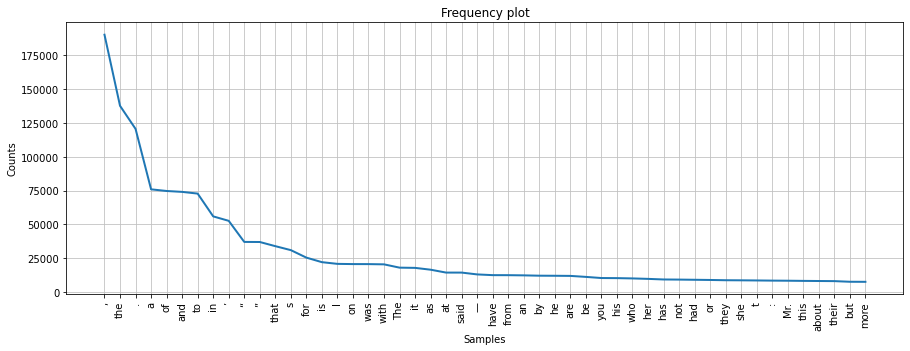

<AxesSubplot:title={'center':'Frequency plot'}, xlabel='Samples', ylabel='Counts'>

In [7]:
comment = ' '.join(df["complete_article"])
#function to split text into word
tokens = word_tokenize(comment)
vocabulary = set(tokens)
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)
plt.subplots(figsize=(15,5))
frequency_dist.plot(50,cumulative=False,title='Frequency plot')

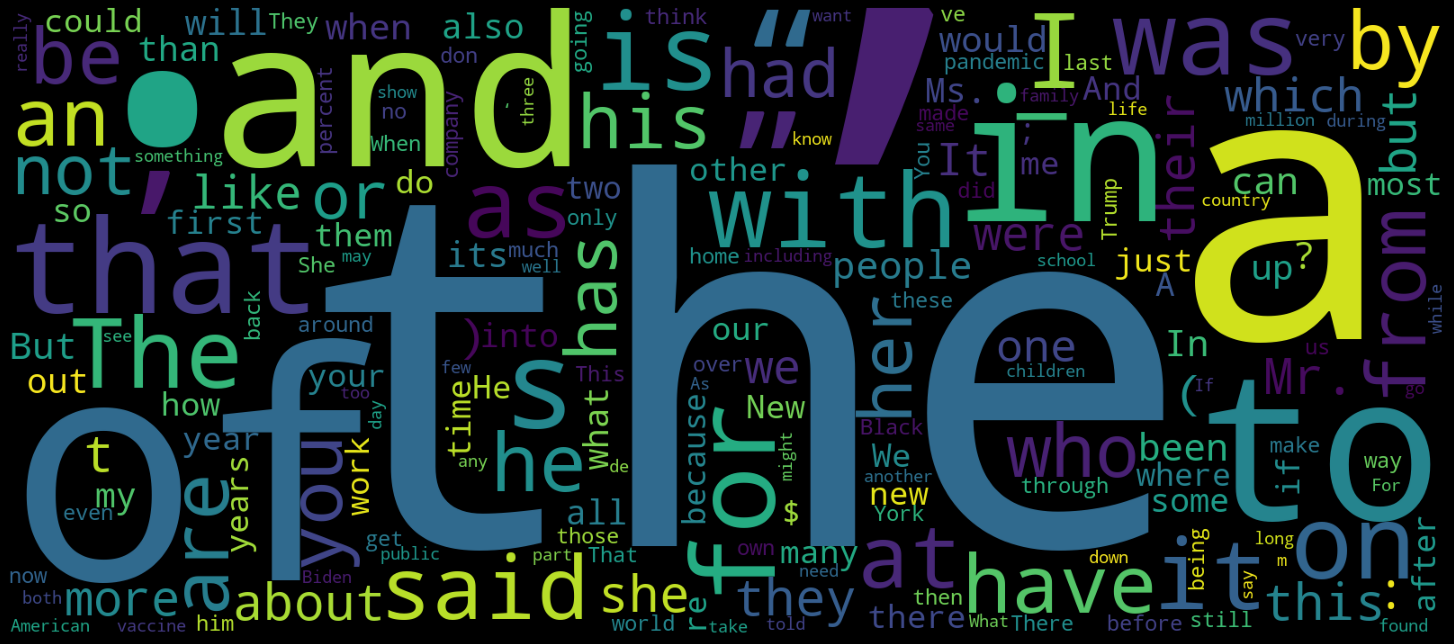

In [8]:
wordcloud = WordCloud(width=1600, height=700).generate_from_frequencies(frequency_dist)
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Preprocessing

In [14]:
def clean_text(text,replace=''):
    pattern = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    text = re.sub(pattern, '', text)
    text = emoji.demojize(str(text))
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"http\S+", "", text)  # removes URL from string
    text = " ".join([word.lemma_ for word in nlp(text) if not word.is_stop if not word.is_punct])
    text = " ".join(re.split("\s+", text, flags=re.UNICODE))
    return text

In [15]:
df['complete_article'] = df['complete_article'].apply(clean_text)

In [16]:
df.head()

,category,sub_category,title,summary,article_body,complete_article
0,news,World,"Margaret C. Snyder, the U.N.’s ‘First Feminist...",Inspired by her liberal Roman Catholic upbring...,"Margaret C. Snyder, whose liberal Roman Cathol...",margaret c. snyder u.n feminist die inspire li...
1,news,World,AstraZeneca Shot Found to Be Protective Agains...,,The Covid-19 vaccine developed by AstraZeneca ...,astrazeneca shot find protective coronavirus v...
2,news,World,The Left’s Vaccine Problem,And what else you need to know today.,Want to get The Morning by email? Here’s the s...,left vaccine problem need know today want morn...
3,news,World,Wisconsin had a mask law. Then it didn’t. Then...,,The politicization of mask wearing reached fev...,wisconsin mask law stay tuned politicization m...
4,news,World,Travel and the Art of Anticipation,"For most people, going on vacation during the ...","For many of us, canceling vacations has become...",travel art anticipation people vacation pandem...


## Frequency Plot and Word Cloud after Data Cleaning

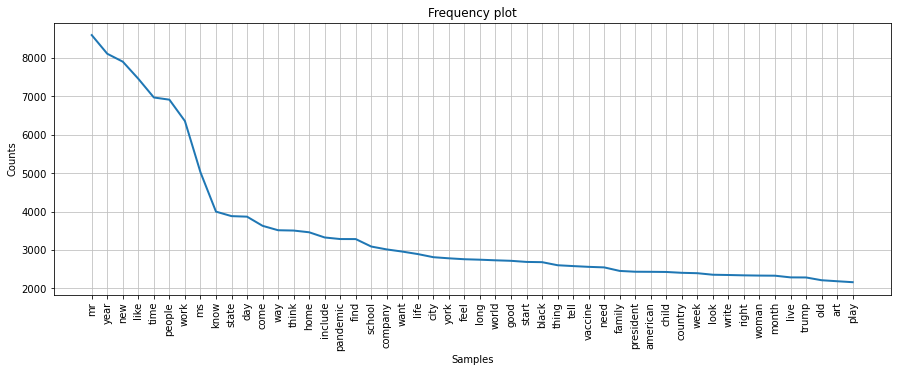

<AxesSubplot:title={'center':'Frequency plot'}, xlabel='Samples', ylabel='Counts'>

In [17]:
comment = ' '.join(df["complete_article"])
#function to split text into word
tokens = word_tokenize(comment)
vocabulary = set(tokens)
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)
plt.subplots(figsize=(15,5))
frequency_dist.plot(50,cumulative=False,title='Frequency plot')

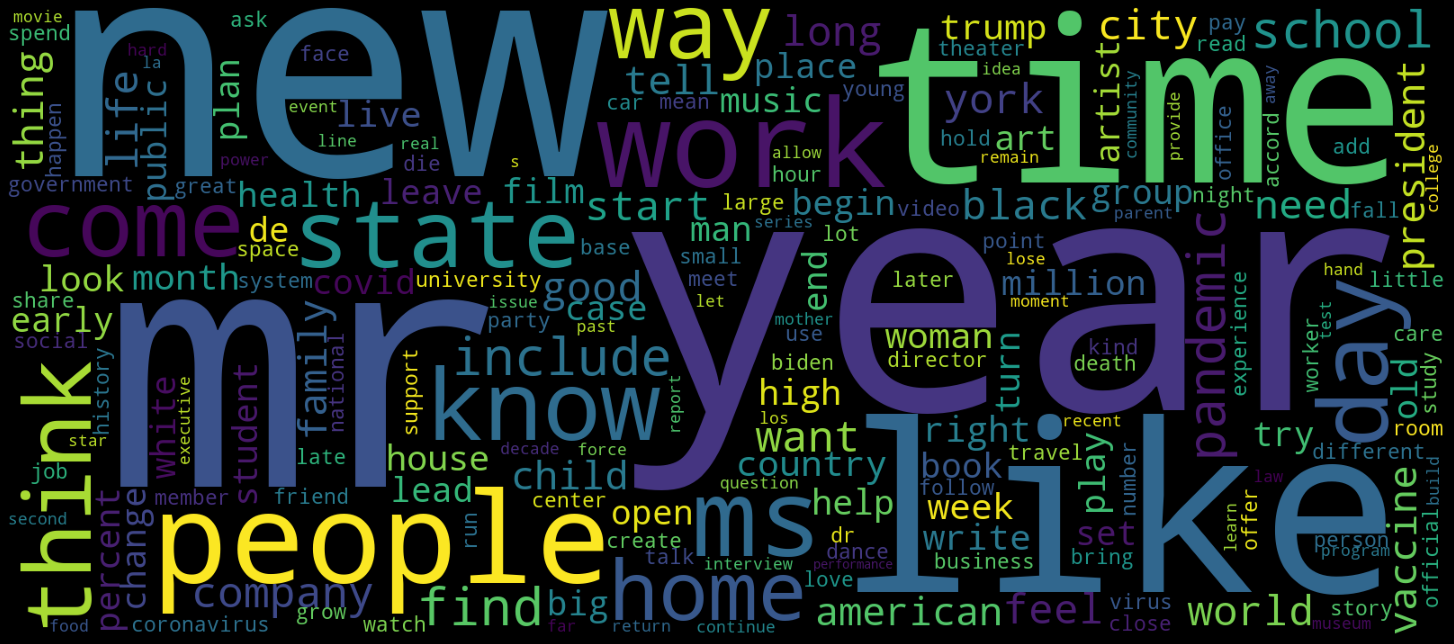

In [18]:
wordcloud = WordCloud(width=1600, height=700).generate_from_frequencies(frequency_dist)
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Sentiment Analysis

In [229]:
sentiment = []

for text in df["complete_article"]:    
    blob = TextBlob(text)
    for sentence in blob.sentences:
        if sentence.sentiment.polarity > 0.0:
            sentiment.append('positive')
        elif sentence.sentiment.polarity < 0.0:
            sentiment.append('negative')
        else:
            sentiment.append('neutral')

df_sentiment = df.copy()
df_sentiment['target'] = pd.DataFrame(sentiment)
df_sentiment.head()

,category,sub_category,title,summary,article_body,complete_article,target
0,news,World,"Margaret C. Snyder, the U.N.’s ‘First Feminist...",Inspired by her liberal Roman Catholic upbring...,"Margaret C. Snyder, whose liberal Roman Cathol...",margaret c. snyder u.n feminist die inspire li...,positive
1,news,World,AstraZeneca Shot Found to Be Protective Agains...,,The Covid-19 vaccine developed by AstraZeneca ...,astrazeneca shot find protective coronavirus v...,positive
2,news,World,The Left’s Vaccine Problem,And what else you need to know today.,Want to get The Morning by email? Here’s the s...,left vaccine problem need know today want morn...,positive
3,news,World,Wisconsin had a mask law. Then it didn’t. Then...,,The politicization of mask wearing reached fev...,wisconsin mask law stay tuned politicization m...,positive
4,news,World,Travel and the Art of Anticipation,"For most people, going on vacation during the ...","For many of us, canceling vacations has become...",travel art anticipation people vacation pandem...,positive


<AxesSubplot:>

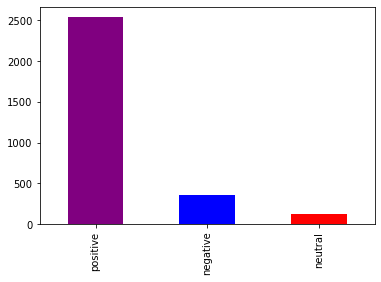

In [231]:
df_sentiment.target.value_counts().plot(kind='bar', color=['purple', 'blue', 'red'])

In [264]:
df_sentiment.to_csv('newyorktimes_positive_negative_sentiment_analysis.csv', index=False)

## Nuanced Sentiment Analysis

In [20]:
import text2emotion as te

In [25]:
emotions = []
for article in df["complete_article"]:
    emotion = te.get_emotion(article)
    print(emotion)
    emotions.append(emotion)
    print(len(emotions))

{'Happy': 0.15, 'Angry': 0.02, 'Surprise': 0.17, 'Sad': 0.18, 'Fear': 0.48}
1
{'Happy': 0.18, 'Angry': 0.05, 'Surprise': 0.0, 'Sad': 0.14, 'Fear': 0.64}
2
{'Happy': 0.08, 'Angry': 0.05, 'Surprise': 0.18, 'Sad': 0.26, 'Fear': 0.43}
3
{'Happy': 0.02, 'Angry': 0.04, 'Surprise': 0.25, 'Sad': 0.37, 'Fear': 0.31}
4
{'Happy': 0.31, 'Angry': 0.04, 'Surprise': 0.13, 'Sad': 0.12, 'Fear': 0.39}
5
{'Happy': 0.16, 'Angry': 0.07, 'Surprise': 0.1, 'Sad': 0.26, 'Fear': 0.41}
6
{'Happy': 0.1, 'Angry': 0.05, 'Surprise': 0.11, 'Sad': 0.24, 'Fear': 0.5}
7
{'Happy': 0.07, 'Angry': 0.04, 'Surprise': 0.19, 'Sad': 0.28, 'Fear': 0.41}
8
{'Happy': 0.06, 'Angry': 0.03, 'Surprise': 0.25, 'Sad': 0.18, 'Fear': 0.49}
9
{'Happy': 0.12, 'Angry': 0.06, 'Surprise': 0.21, 'Sad': 0.14, 'Fear': 0.47}
10
{'Happy': 0.12, 'Angry': 0.04, 'Surprise': 0.18, 'Sad': 0.25, 'Fear': 0.41}
11
{'Happy': 0.1, 'Angry': 0.04, 'Surprise': 0.16, 'Sad': 0.19, 'Fear': 0.52}
12
{'Happy': 0.06, 'Angry': 0.08, 'Surprise': 0.16, 'Sad': 0.15, 'Fea

{'Happy': 0.23, 'Angry': 0.07, 'Surprise': 0.1, 'Sad': 0.27, 'Fear': 0.33}
106
{'Happy': 0.05, 'Angry': 0.0, 'Surprise': 0.24, 'Sad': 0.11, 'Fear': 0.59}
107
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.33, 'Fear': 0.67}
108
{'Happy': 0.13, 'Angry': 0.02, 'Surprise': 0.3, 'Sad': 0.18, 'Fear': 0.37}
109
{'Happy': 0.07, 'Angry': 0.07, 'Surprise': 0.07, 'Sad': 0.4, 'Fear': 0.4}
110
{'Happy': 0.08, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.58, 'Fear': 0.33}
111
{'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.5}
112
{'Happy': 0.03, 'Angry': 0.03, 'Surprise': 0.17, 'Sad': 0.2, 'Fear': 0.57}
113
{'Happy': 0.09, 'Angry': 0.09, 'Surprise': 0.09, 'Sad': 0.26, 'Fear': 0.49}
114
{'Happy': 0.22, 'Angry': 0.03, 'Surprise': 0.14, 'Sad': 0.22, 'Fear': 0.38}
115
{'Happy': 0.06, 'Angry': 0.02, 'Surprise': 0.14, 'Sad': 0.2, 'Fear': 0.58}
116
{'Happy': 0.09, 'Angry': 0.04, 'Surprise': 0.07, 'Sad': 0.26, 'Fear': 0.54}
117
{'Happy': 0.13, 'Angry': 0.06, 'Surprise': 0.37, 'Sad': 0

{'Happy': 0.07, 'Angry': 0.01, 'Surprise': 0.14, 'Sad': 0.19, 'Fear': 0.6}
211
{'Happy': 0.09, 'Angry': 0.05, 'Surprise': 0.23, 'Sad': 0.14, 'Fear': 0.5}
212
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}
213
{'Happy': 0.15, 'Angry': 0.05, 'Surprise': 0.23, 'Sad': 0.17, 'Fear': 0.4}
214
{'Happy': 0.18, 'Angry': 0.06, 'Surprise': 0.14, 'Sad': 0.21, 'Fear': 0.41}
215
{'Happy': 0.17, 'Angry': 0.06, 'Surprise': 0.15, 'Sad': 0.19, 'Fear': 0.43}
216
{'Happy': 0.06, 'Angry': 0.0, 'Surprise': 0.08, 'Sad': 0.17, 'Fear': 0.69}
217
{'Happy': 0.24, 'Angry': 0.0, 'Surprise': 0.47, 'Sad': 0.18, 'Fear': 0.11}
218
{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.0}
219
{'Happy': 0.15, 'Angry': 0.02, 'Surprise': 0.34, 'Sad': 0.15, 'Fear': 0.34}
220
{'Happy': 0.1, 'Angry': 0.05, 'Surprise': 0.08, 'Sad': 0.27, 'Fear': 0.5}
221
{'Happy': 0.12, 'Angry': 0.12, 'Surprise': 0.29, 'Sad': 0.06, 'Fear': 0.41}
222
{'Happy': 0.04, 'Angry': 0.04, 'Surprise': 0.23, 'Sad': 0

{'Happy': 0.08, 'Angry': 0.03, 'Surprise': 0.07, 'Sad': 0.21, 'Fear': 0.61}
316
{'Happy': 0.09, 'Angry': 0.06, 'Surprise': 0.09, 'Sad': 0.16, 'Fear': 0.59}
317
{'Happy': 0.05, 'Angry': 0.12, 'Surprise': 0.18, 'Sad': 0.16, 'Fear': 0.49}
318
{'Happy': 0.08, 'Angry': 0.05, 'Surprise': 0.11, 'Sad': 0.31, 'Fear': 0.45}
319
{'Happy': 0.11, 'Angry': 0.05, 'Surprise': 0.16, 'Sad': 0.23, 'Fear': 0.45}
320
{'Happy': 0.05, 'Angry': 0.02, 'Surprise': 0.16, 'Sad': 0.26, 'Fear': 0.5}
321
{'Happy': 0.14, 'Angry': 0.02, 'Surprise': 0.21, 'Sad': 0.25, 'Fear': 0.38}
322
{'Happy': 0.11, 'Angry': 0.06, 'Surprise': 0.33, 'Sad': 0.11, 'Fear': 0.39}
323
{'Happy': 0.11, 'Angry': 0.07, 'Surprise': 0.17, 'Sad': 0.15, 'Fear': 0.5}
324
{'Happy': 0.15, 'Angry': 0.03, 'Surprise': 0.12, 'Sad': 0.16, 'Fear': 0.53}
325
{'Happy': 0.03, 'Angry': 0.01, 'Surprise': 0.08, 'Sad': 0.34, 'Fear': 0.54}
326
{'Happy': 0.07, 'Angry': 0.0, 'Surprise': 0.13, 'Sad': 0.2, 'Fear': 0.6}
327
{'Happy': 0.06, 'Angry': 0.0, 'Surprise': 0.1

{'Happy': 0.09, 'Angry': 0.06, 'Surprise': 0.18, 'Sad': 0.24, 'Fear': 0.43}
420
{'Happy': 0.13, 'Angry': 0.02, 'Surprise': 0.3, 'Sad': 0.18, 'Fear': 0.37}
421
{'Happy': 0.09, 'Angry': 0.06, 'Surprise': 0.13, 'Sad': 0.06, 'Fear': 0.66}
422
{'Happy': 0.09, 'Angry': 0.04, 'Surprise': 0.24, 'Sad': 0.18, 'Fear': 0.45}
423
{'Happy': 0.17, 'Angry': 0.03, 'Surprise': 0.11, 'Sad': 0.25, 'Fear': 0.44}
424
{'Happy': 0.08, 'Angry': 0.02, 'Surprise': 0.2, 'Sad': 0.11, 'Fear': 0.59}
425
{'Happy': 0.14, 'Angry': 0.02, 'Surprise': 0.11, 'Sad': 0.29, 'Fear': 0.44}
426
{'Happy': 0.12, 'Angry': 0.07, 'Surprise': 0.18, 'Sad': 0.21, 'Fear': 0.41}
427
{'Happy': 0.1, 'Angry': 0.03, 'Surprise': 0.18, 'Sad': 0.11, 'Fear': 0.58}
428
{'Happy': 0.08, 'Angry': 0.02, 'Surprise': 0.23, 'Sad': 0.1, 'Fear': 0.58}
429
{'Happy': 0.1, 'Angry': 0.05, 'Surprise': 0.17, 'Sad': 0.26, 'Fear': 0.43}
430
{'Happy': 0.08, 'Angry': 0.03, 'Surprise': 0.21, 'Sad': 0.26, 'Fear': 0.42}
431
{'Happy': 0.09, 'Angry': 0.01, 'Surprise': 0.

{'Happy': 0.17, 'Angry': 0.0, 'Surprise': 0.11, 'Sad': 0.22, 'Fear': 0.51}
524
{'Happy': 0.09, 'Angry': 0.0, 'Surprise': 0.23, 'Sad': 0.25, 'Fear': 0.44}
525
{'Happy': 0.13, 'Angry': 0.03, 'Surprise': 0.19, 'Sad': 0.23, 'Fear': 0.43}
526
{'Happy': 0.0, 'Angry': 0.1, 'Surprise': 0.08, 'Sad': 0.1, 'Fear': 0.73}
527
{'Happy': 0.14, 'Angry': 0.03, 'Surprise': 0.14, 'Sad': 0.16, 'Fear': 0.53}
528
{'Happy': 0.19, 'Angry': 0.03, 'Surprise': 0.17, 'Sad': 0.22, 'Fear': 0.4}
529
{'Happy': 0.1, 'Angry': 0.08, 'Surprise': 0.16, 'Sad': 0.15, 'Fear': 0.51}
530
{'Happy': 0.1, 'Angry': 0.06, 'Surprise': 0.11, 'Sad': 0.12, 'Fear': 0.61}
531
{'Happy': 0.06, 'Angry': 0.02, 'Surprise': 0.18, 'Sad': 0.26, 'Fear': 0.48}
532
{'Happy': 0.08, 'Angry': 0.04, 'Surprise': 0.13, 'Sad': 0.28, 'Fear': 0.47}
533
{'Happy': 0.05, 'Angry': 0.02, 'Surprise': 0.21, 'Sad': 0.12, 'Fear': 0.59}
534
{'Happy': 0.07, 'Angry': 0.03, 'Surprise': 0.23, 'Sad': 0.18, 'Fear': 0.49}
535
{'Happy': 0.12, 'Angry': 0.0, 'Surprise': 0.1, '

{'Happy': 0.19, 'Angry': 0.0, 'Surprise': 0.11, 'Sad': 0.16, 'Fear': 0.54}
628
{'Happy': 0.06, 'Angry': 0.03, 'Surprise': 0.27, 'Sad': 0.26, 'Fear': 0.38}
629
{'Happy': 0.15, 'Angry': 0.05, 'Surprise': 0.15, 'Sad': 0.2, 'Fear': 0.46}
630
{'Happy': 0.22, 'Angry': 0.12, 'Surprise': 0.08, 'Sad': 0.24, 'Fear': 0.34}
631
{'Happy': 0.05, 'Angry': 0.05, 'Surprise': 0.24, 'Sad': 0.18, 'Fear': 0.49}
632
{'Happy': 0.04, 'Angry': 0.06, 'Surprise': 0.36, 'Sad': 0.19, 'Fear': 0.35}
633
{'Happy': 0.06, 'Angry': 0.03, 'Surprise': 0.26, 'Sad': 0.12, 'Fear': 0.53}
634
{'Happy': 0.04, 'Angry': 0.01, 'Surprise': 0.27, 'Sad': 0.34, 'Fear': 0.33}
635
{'Happy': 0.08, 'Angry': 0.08, 'Surprise': 0.38, 'Sad': 0.1, 'Fear': 0.37}
636
{'Happy': 0.1, 'Angry': 0.1, 'Surprise': 0.1, 'Sad': 0.15, 'Fear': 0.55}
637
{'Happy': 0.14, 'Angry': 0.02, 'Surprise': 0.2, 'Sad': 0.18, 'Fear': 0.46}
638
{'Happy': 0.14, 'Angry': 0.0, 'Surprise': 0.17, 'Sad': 0.28, 'Fear': 0.41}
639
{'Happy': 0.07, 'Angry': 0.07, 'Surprise': 0.11,

{'Happy': 0.07, 'Angry': 0.04, 'Surprise': 0.15, 'Sad': 0.29, 'Fear': 0.45}
732
{'Happy': 0.14, 'Angry': 0.05, 'Surprise': 0.23, 'Sad': 0.28, 'Fear': 0.3}
733
{'Happy': 0.15, 'Angry': 0.11, 'Surprise': 0.11, 'Sad': 0.27, 'Fear': 0.36}
734
{'Happy': 0.09, 'Angry': 0.06, 'Surprise': 0.22, 'Sad': 0.29, 'Fear': 0.35}
735
{'Happy': 0.07, 'Angry': 0.03, 'Surprise': 0.15, 'Sad': 0.27, 'Fear': 0.47}
736
{'Happy': 0.16, 'Angry': 0.04, 'Surprise': 0.11, 'Sad': 0.29, 'Fear': 0.4}
737
{'Happy': 0.1, 'Angry': 0.06, 'Surprise': 0.17, 'Sad': 0.24, 'Fear': 0.43}
738
{'Happy': 0.12, 'Angry': 0.07, 'Surprise': 0.26, 'Sad': 0.13, 'Fear': 0.41}
739
{'Happy': 0.1, 'Angry': 0.05, 'Surprise': 0.13, 'Sad': 0.16, 'Fear': 0.57}
740
{'Happy': 0.06, 'Angry': 0.12, 'Surprise': 0.12, 'Sad': 0.16, 'Fear': 0.54}
741
{'Happy': 0.18, 'Angry': 0.02, 'Surprise': 0.2, 'Sad': 0.29, 'Fear': 0.32}
742
{'Happy': 0.09, 'Angry': 0.04, 'Surprise': 0.18, 'Sad': 0.23, 'Fear': 0.46}
743
{'Happy': 0.13, 'Angry': 0.06, 'Surprise': 0.

{'Happy': 0.06, 'Angry': 0.03, 'Surprise': 0.12, 'Sad': 0.19, 'Fear': 0.6}
836
{'Happy': 0.1, 'Angry': 0.03, 'Surprise': 0.16, 'Sad': 0.15, 'Fear': 0.56}
837
{'Happy': 0.07, 'Angry': 0.03, 'Surprise': 0.09, 'Sad': 0.23, 'Fear': 0.57}
838
{'Happy': 0.11, 'Angry': 0.09, 'Surprise': 0.19, 'Sad': 0.2, 'Fear': 0.41}
839
{'Happy': 0.12, 'Angry': 0.02, 'Surprise': 0.17, 'Sad': 0.08, 'Fear': 0.62}
840
{'Happy': 0.05, 'Angry': 0.05, 'Surprise': 0.23, 'Sad': 0.23, 'Fear': 0.44}
841
{'Happy': 0.03, 'Angry': 0.0, 'Surprise': 0.28, 'Sad': 0.17, 'Fear': 0.53}
842
{'Happy': 0.15, 'Angry': 0.06, 'Surprise': 0.24, 'Sad': 0.14, 'Fear': 0.42}
843
{'Happy': 0.14, 'Angry': 0.02, 'Surprise': 0.24, 'Sad': 0.14, 'Fear': 0.47}
844
{'Happy': 0.1, 'Angry': 0.18, 'Surprise': 0.14, 'Sad': 0.08, 'Fear': 0.5}
845
{'Happy': 0.09, 'Angry': 0.05, 'Surprise': 0.15, 'Sad': 0.21, 'Fear': 0.5}
846
{'Happy': 0.1, 'Angry': 0.07, 'Surprise': 0.16, 'Sad': 0.21, 'Fear': 0.47}
847
{'Happy': 0.11, 'Angry': 0.01, 'Surprise': 0.14,

{'Happy': 0.1, 'Angry': 0.0, 'Surprise': 0.13, 'Sad': 0.2, 'Fear': 0.57}
940
{'Happy': 0.13, 'Angry': 0.01, 'Surprise': 0.28, 'Sad': 0.21, 'Fear': 0.37}
941
{'Happy': 0.09, 'Angry': 0.07, 'Surprise': 0.16, 'Sad': 0.18, 'Fear': 0.5}
942
{'Happy': 0.13, 'Angry': 0.09, 'Surprise': 0.22, 'Sad': 0.13, 'Fear': 0.43}
943
{'Happy': 0.05, 'Angry': 0.1, 'Surprise': 0.18, 'Sad': 0.25, 'Fear': 0.42}
944
{'Happy': 0.15, 'Angry': 0.04, 'Surprise': 0.16, 'Sad': 0.23, 'Fear': 0.42}
945
{'Happy': 0.15, 'Angry': 0.08, 'Surprise': 0.22, 'Sad': 0.12, 'Fear': 0.43}
946
{'Happy': 0.09, 'Angry': 0.06, 'Surprise': 0.22, 'Sad': 0.12, 'Fear': 0.51}
947
{'Happy': 0.09, 'Angry': 0.03, 'Surprise': 0.33, 'Sad': 0.15, 'Fear': 0.39}
948
{'Happy': 0.18, 'Angry': 0.06, 'Surprise': 0.21, 'Sad': 0.16, 'Fear': 0.4}
949
{'Happy': 0.11, 'Angry': 0.02, 'Surprise': 0.18, 'Sad': 0.26, 'Fear': 0.44}
950
{'Happy': 0.08, 'Angry': 0.03, 'Surprise': 0.22, 'Sad': 0.17, 'Fear': 0.5}
951
{'Happy': 0.03, 'Angry': 0.06, 'Surprise': 0.16

{'Happy': 0.09, 'Angry': 0.03, 'Surprise': 0.2, 'Sad': 0.23, 'Fear': 0.45}
1043
{'Happy': 0.2, 'Angry': 0.05, 'Surprise': 0.2, 'Sad': 0.17, 'Fear': 0.39}
1044
{'Happy': 0.13, 'Angry': 0.07, 'Surprise': 0.11, 'Sad': 0.14, 'Fear': 0.54}
1045
{'Happy': 0.2, 'Angry': 0.1, 'Surprise': 0.14, 'Sad': 0.2, 'Fear': 0.35}
1046
{'Happy': 0.1, 'Angry': 0.05, 'Surprise': 0.12, 'Sad': 0.19, 'Fear': 0.54}
1047
{'Happy': 0.13, 'Angry': 0.05, 'Surprise': 0.18, 'Sad': 0.26, 'Fear': 0.37}
1048
{'Happy': 0.1, 'Angry': 0.05, 'Surprise': 0.35, 'Sad': 0.15, 'Fear': 0.36}
1049
{'Happy': 0.11, 'Angry': 0.06, 'Surprise': 0.06, 'Sad': 0.21, 'Fear': 0.57}
1050
{'Happy': 0.05, 'Angry': 0.05, 'Surprise': 0.09, 'Sad': 0.78, 'Fear': 0.03}
1051
{'Happy': 0.16, 'Angry': 0.02, 'Surprise': 0.17, 'Sad': 0.1, 'Fear': 0.55}
1052
{'Happy': 0.12, 'Angry': 0.04, 'Surprise': 0.21, 'Sad': 0.12, 'Fear': 0.49}
1053
{'Happy': 0.22, 'Angry': 0.11, 'Surprise': 0.22, 'Sad': 0.22, 'Fear': 0.22}
1054
{'Happy': 0.26, 'Angry': 0.06, 'Surpr

{'Happy': 0.16, 'Angry': 0.08, 'Surprise': 0.18, 'Sad': 0.23, 'Fear': 0.34}
1145
{'Happy': 0.1, 'Angry': 0.12, 'Surprise': 0.24, 'Sad': 0.14, 'Fear': 0.4}
1146
{'Happy': 0.13, 'Angry': 0.05, 'Surprise': 0.14, 'Sad': 0.19, 'Fear': 0.49}
1147
{'Happy': 0.12, 'Angry': 0.05, 'Surprise': 0.15, 'Sad': 0.2, 'Fear': 0.48}
1148
{'Happy': 0.11, 'Angry': 0.1, 'Surprise': 0.2, 'Sad': 0.21, 'Fear': 0.38}
1149
{'Happy': 0.25, 'Angry': 0.03, 'Surprise': 0.17, 'Sad': 0.19, 'Fear': 0.36}
1150
{'Happy': 0.08, 'Angry': 0.08, 'Surprise': 0.15, 'Sad': 0.19, 'Fear': 0.5}
1151
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
1152
{'Happy': 0.08, 'Angry': 0.04, 'Surprise': 0.28, 'Sad': 0.26, 'Fear': 0.34}
1153
{'Happy': 0.09, 'Angry': 0.07, 'Surprise': 0.19, 'Sad': 0.3, 'Fear': 0.35}
1154
{'Happy': 0.12, 'Angry': 0.04, 'Surprise': 0.15, 'Sad': 0.35, 'Fear': 0.35}
1155
{'Happy': 0.12, 'Angry': 0.08, 'Surprise': 0.14, 'Sad': 0.24, 'Fear': 0.41}
1156
{'Happy': 0.14, 'Angry': 0.02, 'Surprise': 0.24, '

{'Happy': 0.06, 'Angry': 0.12, 'Surprise': 0.23, 'Sad': 0.27, 'Fear': 0.32}
1248
{'Happy': 0.08, 'Angry': 0.01, 'Surprise': 0.17, 'Sad': 0.23, 'Fear': 0.51}
1249
{'Happy': 0.0, 'Angry': 0.28, 'Surprise': 0.11, 'Sad': 0.17, 'Fear': 0.44}
1250
{'Happy': 0.07, 'Angry': 0.07, 'Surprise': 0.16, 'Sad': 0.19, 'Fear': 0.51}
1251
{'Happy': 0.09, 'Angry': 0.12, 'Surprise': 0.21, 'Sad': 0.21, 'Fear': 0.38}
1252
{'Happy': 0.17, 'Angry': 0.05, 'Surprise': 0.22, 'Sad': 0.1, 'Fear': 0.45}
1253
{'Happy': 0.07, 'Angry': 0.07, 'Surprise': 0.09, 'Sad': 0.23, 'Fear': 0.54}
1254
{'Happy': 0.09, 'Angry': 0.1, 'Surprise': 0.18, 'Sad': 0.17, 'Fear': 0.46}
1255
{'Happy': 0.26, 'Angry': 0.05, 'Surprise': 0.31, 'Sad': 0.11, 'Fear': 0.27}
1256
{'Happy': 0.16, 'Angry': 0.06, 'Surprise': 0.2, 'Sad': 0.22, 'Fear': 0.36}
1257
{'Happy': 0.09, 'Angry': 0.03, 'Surprise': 0.15, 'Sad': 0.24, 'Fear': 0.49}
1258
{'Happy': 0.15, 'Angry': 0.05, 'Surprise': 0.19, 'Sad': 0.27, 'Fear': 0.33}
1259
{'Happy': 0.11, 'Angry': 0.05, '

{'Happy': 0.17, 'Angry': 0.03, 'Surprise': 0.2, 'Sad': 0.21, 'Fear': 0.39}
1350
{'Happy': 0.18, 'Angry': 0.05, 'Surprise': 0.33, 'Sad': 0.11, 'Fear': 0.33}
1351
{'Happy': 0.14, 'Angry': 0.05, 'Surprise': 0.2, 'Sad': 0.25, 'Fear': 0.35}
1352
{'Happy': 0.38, 'Angry': 0.04, 'Surprise': 0.16, 'Sad': 0.17, 'Fear': 0.26}
1353
{'Happy': 0.19, 'Angry': 0.07, 'Surprise': 0.27, 'Sad': 0.16, 'Fear': 0.32}
1354
{'Happy': 0.08, 'Angry': 0.0, 'Surprise': 0.42, 'Sad': 0.08, 'Fear': 0.42}
1355
{'Happy': 0.17, 'Angry': 0.05, 'Surprise': 0.12, 'Sad': 0.22, 'Fear': 0.44}
1356
{'Happy': 0.16, 'Angry': 0.08, 'Surprise': 0.18, 'Sad': 0.23, 'Fear': 0.34}
1357
{'Happy': 0.11, 'Angry': 0.1, 'Surprise': 0.2, 'Sad': 0.21, 'Fear': 0.38}
1358
{'Happy': 0.25, 'Angry': 0.03, 'Surprise': 0.17, 'Sad': 0.19, 'Fear': 0.36}
1359
{'Happy': 0.07, 'Angry': 0.01, 'Surprise': 0.2, 'Sad': 0.32, 'Fear': 0.4}
1360
{'Happy': 0.0, 'Angry': 0.28, 'Surprise': 0.11, 'Sad': 0.17, 'Fear': 0.44}
1361
{'Happy': 0.13, 'Angry': 0.02, 'Surp

{'Happy': 0.18, 'Angry': 0.05, 'Surprise': 0.22, 'Sad': 0.23, 'Fear': 0.31}
1452
{'Happy': 0.07, 'Angry': 0.06, 'Surprise': 0.17, 'Sad': 0.37, 'Fear': 0.33}
1453
{'Happy': 0.03, 'Angry': 0.08, 'Surprise': 0.16, 'Sad': 0.18, 'Fear': 0.55}
1454
{'Happy': 0.19, 'Angry': 0.02, 'Surprise': 0.15, 'Sad': 0.17, 'Fear': 0.47}
1455
{'Happy': 0.05, 'Angry': 0.02, 'Surprise': 0.27, 'Sad': 0.23, 'Fear': 0.43}
1456
{'Happy': 0.09, 'Angry': 0.03, 'Surprise': 0.15, 'Sad': 0.19, 'Fear': 0.54}
1457
{'Happy': 0.09, 'Angry': 0.0, 'Surprise': 0.21, 'Sad': 0.36, 'Fear': 0.33}
1458
{'Happy': 0.16, 'Angry': 0.06, 'Surprise': 0.15, 'Sad': 0.19, 'Fear': 0.43}
1459
{'Happy': 0.17, 'Angry': 0.05, 'Surprise': 0.13, 'Sad': 0.22, 'Fear': 0.43}
1460
{'Happy': 0.08, 'Angry': 0.04, 'Surprise': 0.16, 'Sad': 0.43, 'Fear': 0.3}
1461
{'Happy': 0.19, 'Angry': 0.03, 'Surprise': 0.1, 'Sad': 0.22, 'Fear': 0.46}
1462
{'Happy': 0.14, 'Angry': 0.07, 'Surprise': 0.29, 'Sad': 0.24, 'Fear': 0.26}
1463
{'Happy': 0.13, 'Angry': 0.05, 

{'Happy': 0.22, 'Angry': 0.03, 'Surprise': 0.07, 'Sad': 0.22, 'Fear': 0.46}
1554
{'Happy': 0.12, 'Angry': 0.05, 'Surprise': 0.15, 'Sad': 0.2, 'Fear': 0.48}
1555
{'Happy': 0.13, 'Angry': 0.04, 'Surprise': 0.1, 'Sad': 0.19, 'Fear': 0.54}
1556
{'Happy': 0.24, 'Angry': 0.0, 'Surprise': 0.24, 'Sad': 0.04, 'Fear': 0.48}
1557
{'Happy': 0.16, 'Angry': 0.05, 'Surprise': 0.19, 'Sad': 0.18, 'Fear': 0.42}
1558
{'Happy': 0.14, 'Angry': 0.03, 'Surprise': 0.14, 'Sad': 0.15, 'Fear': 0.54}
1559
{'Happy': 0.16, 'Angry': 0.09, 'Surprise': 0.26, 'Sad': 0.11, 'Fear': 0.39}
1560
{'Happy': 0.12, 'Angry': 0.05, 'Surprise': 0.15, 'Sad': 0.22, 'Fear': 0.46}
1561
{'Happy': 0.17, 'Angry': 0.04, 'Surprise': 0.15, 'Sad': 0.15, 'Fear': 0.49}
1562
{'Happy': 0.14, 'Angry': 0.05, 'Surprise': 0.2, 'Sad': 0.17, 'Fear': 0.44}
1563
{'Happy': 0.12, 'Angry': 0.03, 'Surprise': 0.12, 'Sad': 0.13, 'Fear': 0.6}
1564
{'Happy': 0.13, 'Angry': 0.07, 'Surprise': 0.19, 'Sad': 0.14, 'Fear': 0.47}
1565
{'Happy': 0.1, 'Angry': 0.13, 'Su

{'Happy': 0.11, 'Angry': 0.1, 'Surprise': 0.2, 'Sad': 0.21, 'Fear': 0.38}
1657
{'Happy': 0.24, 'Angry': 0.04, 'Surprise': 0.22, 'Sad': 0.11, 'Fear': 0.39}
1658
{'Happy': 0.07, 'Angry': 0.01, 'Surprise': 0.2, 'Sad': 0.32, 'Fear': 0.4}
1659
{'Happy': 0.22, 'Angry': 0.06, 'Surprise': 0.2, 'Sad': 0.22, 'Fear': 0.3}
1660
{'Happy': 0.19, 'Angry': 0.06, 'Surprise': 0.17, 'Sad': 0.11, 'Fear': 0.47}
1661
{'Happy': 0.07, 'Angry': 0.07, 'Surprise': 0.16, 'Sad': 0.19, 'Fear': 0.51}
1662
{'Happy': 0.21, 'Angry': 0.04, 'Surprise': 0.26, 'Sad': 0.17, 'Fear': 0.32}
1663
{'Happy': 0.08, 'Angry': 0.04, 'Surprise': 0.28, 'Sad': 0.26, 'Fear': 0.34}
1664
{'Happy': 0.09, 'Angry': 0.12, 'Surprise': 0.21, 'Sad': 0.21, 'Fear': 0.38}
1665
{'Happy': 0.17, 'Angry': 0.23, 'Surprise': 0.08, 'Sad': 0.19, 'Fear': 0.33}
1666
{'Happy': 0.21, 'Angry': 0.05, 'Surprise': 0.12, 'Sad': 0.19, 'Fear': 0.43}
1667
{'Happy': 0.11, 'Angry': 0.04, 'Surprise': 0.15, 'Sad': 0.25, 'Fear': 0.45}
1668
{'Happy': 0.19, 'Angry': 0.05, 'Su

{'Happy': 0.16, 'Angry': 0.04, 'Surprise': 0.22, 'Sad': 0.21, 'Fear': 0.37}
1760
{'Happy': 0.08, 'Angry': 0.07, 'Surprise': 0.14, 'Sad': 0.21, 'Fear': 0.51}
1761
{'Happy': 0.09, 'Angry': 0.09, 'Surprise': 0.15, 'Sad': 0.22, 'Fear': 0.46}
1762
{'Happy': 0.08, 'Angry': 0.08, 'Surprise': 0.24, 'Sad': 0.11, 'Fear': 0.49}
1763
{'Happy': 0.06, 'Angry': 0.05, 'Surprise': 0.16, 'Sad': 0.23, 'Fear': 0.49}
1764
{'Happy': 0.29, 'Angry': 0.0, 'Surprise': 0.21, 'Sad': 0.14, 'Fear': 0.36}
1765
{'Happy': 0.07, 'Angry': 0.07, 'Surprise': 0.29, 'Sad': 0.15, 'Fear': 0.42}
1766
{'Happy': 0.05, 'Angry': 0.03, 'Surprise': 0.13, 'Sad': 0.11, 'Fear': 0.68}
1767
{'Happy': 0.06, 'Angry': 0.1, 'Surprise': 0.2, 'Sad': 0.15, 'Fear': 0.49}
1768
{'Happy': 0.04, 'Angry': 0.04, 'Surprise': 0.21, 'Sad': 0.22, 'Fear': 0.49}
1769
{'Happy': 0.08, 'Angry': 0.01, 'Surprise': 0.15, 'Sad': 0.12, 'Fear': 0.64}
1770
{'Happy': 0.12, 'Angry': 0.04, 'Surprise': 0.17, 'Sad': 0.29, 'Fear': 0.38}
1771
{'Happy': 0.12, 'Angry': 0.08, 

{'Happy': 0.14, 'Angry': 0.0, 'Surprise': 0.16, 'Sad': 0.26, 'Fear': 0.44}
1863
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.27, 'Sad': 0.09, 'Fear': 0.64}
1864
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.14, 'Sad': 0.14, 'Fear': 0.71}
1865
{'Happy': 0.14, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.29, 'Fear': 0.57}
1866
{'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.5}
1867
{'Happy': 0.13, 'Angry': 0.0, 'Surprise': 0.07, 'Sad': 0.07, 'Fear': 0.73}
1868
{'Happy': 0.11, 'Angry': 0.11, 'Surprise': 0.0, 'Sad': 0.11, 'Fear': 0.67}
1869
{'Happy': 0.0, 'Angry': 0.11, 'Surprise': 0.0, 'Sad': 0.33, 'Fear': 0.56}
1870
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.12, 'Sad': 0.38, 'Fear': 0.5}
1871
{'Happy': 0.09, 'Angry': 0.01, 'Surprise': 0.2, 'Sad': 0.21, 'Fear': 0.49}
1872
{'Happy': 0.15, 'Angry': 0.08, 'Surprise': 0.13, 'Sad': 0.23, 'Fear': 0.41}
1873
{'Happy': 0.12, 'Angry': 0.04, 'Surprise': 0.12, 'Sad': 0.28, 'Fear': 0.43}
1874
{'Happy': 0.19, 'Angry': 0.06, 'Surprise': 0.14,

{'Happy': 0.14, 'Angry': 0.09, 'Surprise': 0.18, 'Sad': 0.21, 'Fear': 0.38}
1967
{'Happy': 0.27, 'Angry': 0.0, 'Surprise': 0.22, 'Sad': 0.17, 'Fear': 0.34}
1968
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
1969
{'Happy': 0.1, 'Angry': 0.1, 'Surprise': 0.11, 'Sad': 0.27, 'Fear': 0.42}
1970
{'Happy': 0.22, 'Angry': 0.08, 'Surprise': 0.25, 'Sad': 0.2, 'Fear': 0.24}
1971
{'Happy': 0.19, 'Angry': 0.09, 'Surprise': 0.21, 'Sad': 0.24, 'Fear': 0.28}
1972
{'Happy': 0.07, 'Angry': 0.05, 'Surprise': 0.17, 'Sad': 0.24, 'Fear': 0.48}
1973
{'Happy': 0.13, 'Angry': 0.07, 'Surprise': 0.15, 'Sad': 0.14, 'Fear': 0.5}
1974
{'Happy': 0.12, 'Angry': 0.01, 'Surprise': 0.12, 'Sad': 0.2, 'Fear': 0.56}
1975
{'Happy': 0.13, 'Angry': 0.06, 'Surprise': 0.09, 'Sad': 0.2, 'Fear': 0.52}
1976
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}
1977
{'Happy': 0.12, 'Angry': 0.0, 'Surprise': 0.38, 'Sad': 0.12, 'Fear': 0.38}
1978
{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.25, 'Sad': 0

{'Happy': 0.16, 'Angry': 0.06, 'Surprise': 0.14, 'Sad': 0.16, 'Fear': 0.48}
2071
{'Happy': 0.17, 'Angry': 0.23, 'Surprise': 0.08, 'Sad': 0.19, 'Fear': 0.33}
2072
{'Happy': 0.11, 'Angry': 0.04, 'Surprise': 0.15, 'Sad': 0.25, 'Fear': 0.45}
2073
{'Happy': 0.19, 'Angry': 0.05, 'Surprise': 0.1, 'Sad': 0.33, 'Fear': 0.33}
2074
{'Happy': 0.16, 'Angry': 0.04, 'Surprise': 0.16, 'Sad': 0.16, 'Fear': 0.48}
2075
{'Happy': 0.11, 'Angry': 0.03, 'Surprise': 0.21, 'Sad': 0.17, 'Fear': 0.49}
2076
{'Happy': 0.17, 'Angry': 0.05, 'Surprise': 0.22, 'Sad': 0.1, 'Fear': 0.45}
2077
{'Happy': 0.08, 'Angry': 0.06, 'Surprise': 0.18, 'Sad': 0.23, 'Fear': 0.45}
2078
{'Happy': 0.12, 'Angry': 0.08, 'Surprise': 0.16, 'Sad': 0.08, 'Fear': 0.56}
2079
{'Happy': 0.09, 'Angry': 0.1, 'Surprise': 0.05, 'Sad': 0.28, 'Fear': 0.48}
2080
{'Happy': 0.12, 'Angry': 0.07, 'Surprise': 0.19, 'Sad': 0.19, 'Fear': 0.42}
2081
{'Happy': 0.23, 'Angry': 0.03, 'Surprise': 0.21, 'Sad': 0.23, 'Fear': 0.31}
2082
{'Happy': 0.14, 'Angry': 0.09, 

{'Happy': 0.08, 'Angry': 0.16, 'Surprise': 0.11, 'Sad': 0.26, 'Fear': 0.4}
2174
{'Happy': 0.1, 'Angry': 0.02, 'Surprise': 0.12, 'Sad': 0.17, 'Fear': 0.59}
2175
{'Happy': 0.1, 'Angry': 0.05, 'Surprise': 0.14, 'Sad': 0.16, 'Fear': 0.55}
2176
{'Happy': 0.12, 'Angry': 0.04, 'Surprise': 0.25, 'Sad': 0.18, 'Fear': 0.42}
2177
{'Happy': 0.11, 'Angry': 0.04, 'Surprise': 0.2, 'Sad': 0.17, 'Fear': 0.48}
2178
{'Happy': 0.15, 'Angry': 0.03, 'Surprise': 0.1, 'Sad': 0.14, 'Fear': 0.58}
2179
{'Happy': 0.07, 'Angry': 0.05, 'Surprise': 0.29, 'Sad': 0.07, 'Fear': 0.51}
2180
{'Happy': 0.14, 'Angry': 0.08, 'Surprise': 0.12, 'Sad': 0.22, 'Fear': 0.44}
2181
{'Happy': 0.14, 'Angry': 0.04, 'Surprise': 0.22, 'Sad': 0.24, 'Fear': 0.35}
2182
{'Happy': 0.07, 'Angry': 0.0, 'Surprise': 0.2, 'Sad': 0.23, 'Fear': 0.5}
2183
{'Happy': 0.02, 'Angry': 0.0, 'Surprise': 0.12, 'Sad': 0.17, 'Fear': 0.68}
2184
{'Happy': 0.15, 'Angry': 0.06, 'Surprise': 0.18, 'Sad': 0.16, 'Fear': 0.46}
2185
{'Happy': 0.1, 'Angry': 0.05, 'Surpri

{'Happy': 0.25, 'Angry': 0.04, 'Surprise': 0.34, 'Sad': 0.05, 'Fear': 0.32}
2276
{'Happy': 0.21, 'Angry': 0.0, 'Surprise': 0.5, 'Sad': 0.07, 'Fear': 0.21}
2277
{'Happy': 0.27, 'Angry': 0.09, 'Surprise': 0.09, 'Sad': 0.23, 'Fear': 0.32}
2278
{'Happy': 0.11, 'Angry': 0.07, 'Surprise': 0.25, 'Sad': 0.16, 'Fear': 0.41}
2279
{'Happy': 0.11, 'Angry': 0.11, 'Surprise': 0.14, 'Sad': 0.16, 'Fear': 0.49}
2280
{'Happy': 0.23, 'Angry': 0.05, 'Surprise': 0.12, 'Sad': 0.05, 'Fear': 0.56}
2281
{'Happy': 0.24, 'Angry': 0.0, 'Surprise': 0.21, 'Sad': 0.1, 'Fear': 0.45}
2282
{'Happy': 0.41, 'Angry': 0.06, 'Surprise': 0.18, 'Sad': 0.06, 'Fear': 0.29}
2283
{'Happy': 0.08, 'Angry': 0.0, 'Surprise': 0.22, 'Sad': 0.11, 'Fear': 0.58}
2284
{'Happy': 0.18, 'Angry': 0.02, 'Surprise': 0.24, 'Sad': 0.2, 'Fear': 0.36}
2285
{'Happy': 0.28, 'Angry': 0.13, 'Surprise': 0.13, 'Sad': 0.15, 'Fear': 0.31}
2286
{'Happy': 0.26, 'Angry': 0.05, 'Surprise': 0.12, 'Sad': 0.23, 'Fear': 0.33}
2287
{'Happy': 0.17, 'Angry': 0.05, 'Su

{'Happy': 0.2, 'Angry': 0.05, 'Surprise': 0.18, 'Sad': 0.18, 'Fear': 0.39}
2378
{'Happy': 0.17, 'Angry': 0.02, 'Surprise': 0.21, 'Sad': 0.12, 'Fear': 0.48}
2379
{'Happy': 0.0, 'Angry': 0.18, 'Surprise': 0.45, 'Sad': 0.18, 'Fear': 0.18}
2380
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
2381
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
2382
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.4, 'Sad': 0.4, 'Fear': 0.2}
2383
{'Happy': 0.1, 'Angry': 0.04, 'Surprise': 0.13, 'Sad': 0.2, 'Fear': 0.52}
2384
{'Happy': 0.06, 'Angry': 0.12, 'Surprise': 0.15, 'Sad': 0.24, 'Fear': 0.42}
2385
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
2386
{'Happy': 0.09, 'Angry': 0.03, 'Surprise': 0.16, 'Sad': 0.24, 'Fear': 0.48}
2387
{'Happy': 0.19, 'Angry': 0.09, 'Surprise': 0.21, 'Sad': 0.24, 'Fear': 0.28}
2388
{'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.5, 'Fear': 0.0}
2389
{'Happy': 0.07, 'Angry': 0.06, 'Surprise': 0.17, 'Sad': 0.22, 'Fear': 0.48}
2390
{'Happ

{'Happy': 0.17, 'Angry': 0.06, 'Surprise': 0.14, 'Sad': 0.12, 'Fear': 0.5}
2490
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
2491
{'Happy': 0.07, 'Angry': 0.04, 'Surprise': 0.25, 'Sad': 0.13, 'Fear': 0.51}
2492
{'Happy': 0.08, 'Angry': 0.01, 'Surprise': 0.28, 'Sad': 0.19, 'Fear': 0.44}
2493
{'Happy': 0.21, 'Angry': 0.01, 'Surprise': 0.11, 'Sad': 0.13, 'Fear': 0.54}
2494
{'Happy': 0.0, 'Angry': 0.18, 'Surprise': 0.45, 'Sad': 0.18, 'Fear': 0.18}
2495
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
2496
{'Happy': 0.26, 'Angry': 0.06, 'Surprise': 0.26, 'Sad': 0.16, 'Fear': 0.25}
2497
{'Happy': 0.1, 'Angry': 0.08, 'Surprise': 0.39, 'Sad': 0.18, 'Fear': 0.26}
2498
{'Happy': 0.09, 'Angry': 0.0, 'Surprise': 0.17, 'Sad': 0.28, 'Fear': 0.46}
2499
{'Happy': 0.17, 'Angry': 0.23, 'Surprise': 0.08, 'Sad': 0.19, 'Fear': 0.33}
2500
{'Happy': 0.11, 'Angry': 0.04, 'Surprise': 0.15, 'Sad': 0.25, 'Fear': 0.45}
2501
{'Happy': 0.19, 'Angry': 0.05, 'Surprise': 0.1, 'Sad': 0.33, '

{'Happy': 0.12, 'Angry': 0.04, 'Surprise': 0.14, 'Sad': 0.2, 'Fear': 0.51}
2593
{'Happy': 0.1, 'Angry': 0.05, 'Surprise': 0.26, 'Sad': 0.23, 'Fear': 0.35}
2594
{'Happy': 0.14, 'Angry': 0.07, 'Surprise': 0.28, 'Sad': 0.2, 'Fear': 0.31}
2595
{'Happy': 0.17, 'Angry': 0.04, 'Surprise': 0.19, 'Sad': 0.17, 'Fear': 0.43}
2596
{'Happy': 0.15, 'Angry': 0.06, 'Surprise': 0.29, 'Sad': 0.17, 'Fear': 0.33}
2597
{'Happy': 0.21, 'Angry': 0.09, 'Surprise': 0.15, 'Sad': 0.13, 'Fear': 0.41}
2598
{'Happy': 0.06, 'Angry': 0.07, 'Surprise': 0.17, 'Sad': 0.36, 'Fear': 0.34}
2599
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
2600
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
2601
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
2602
{'Happy': 0.11, 'Angry': 0.0, 'Surprise': 0.06, 'Sad': 0.28, 'Fear': 0.56}
2603
{'Happy': 0.17, 'Angry': 0.03, 'Surprise': 0.15, 'Sad': 0.23, 'Fear': 0.42}
2604
{'Happy': 0.13, 'Angry': 0.16, 'Surprise': 0.17, 'Sad': 0.2, 'Fear': 0.33}
26

{'Happy': 0.14, 'Angry': 0.05, 'Surprise': 0.27, 'Sad': 0.16, 'Fear': 0.38}
2700
{'Happy': 0.09, 'Angry': 0.02, 'Surprise': 0.18, 'Sad': 0.16, 'Fear': 0.55}
2701
{'Happy': 0.22, 'Angry': 0.02, 'Surprise': 0.31, 'Sad': 0.11, 'Fear': 0.35}
2702
{'Happy': 0.23, 'Angry': 0.0, 'Surprise': 0.26, 'Sad': 0.11, 'Fear': 0.4}
2703
{'Happy': 0.08, 'Angry': 0.02, 'Surprise': 0.13, 'Sad': 0.24, 'Fear': 0.53}
2704
{'Happy': 0.2, 'Angry': 0.03, 'Surprise': 0.09, 'Sad': 0.17, 'Fear': 0.51}
2705
{'Happy': 0.07, 'Angry': 0.05, 'Surprise': 0.18, 'Sad': 0.19, 'Fear': 0.51}
2706
{'Happy': 0.1, 'Angry': 0.01, 'Surprise': 0.19, 'Sad': 0.31, 'Fear': 0.38}
2707
{'Happy': 0.11, 'Angry': 0.04, 'Surprise': 0.31, 'Sad': 0.14, 'Fear': 0.39}
2708
{'Happy': 0.15, 'Angry': 0.04, 'Surprise': 0.13, 'Sad': 0.24, 'Fear': 0.44}
2709
{'Happy': 0.26, 'Angry': 0.06, 'Surprise': 0.26, 'Sad': 0.16, 'Fear': 0.25}
2710
{'Happy': 0.16, 'Angry': 0.05, 'Surprise': 0.22, 'Sad': 0.2, 'Fear': 0.38}
2711
{'Happy': 0.07, 'Angry': 0.05, 'S

{'Happy': 0.13, 'Angry': 0.13, 'Surprise': 0.13, 'Sad': 0.3, 'Fear': 0.3}
2802
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, 'Sad': 0.0, 'Fear': 0.0}
2803
{'Happy': 0.12, 'Angry': 0.09, 'Surprise': 0.16, 'Sad': 0.18, 'Fear': 0.45}
2804
{'Happy': 0.09, 'Angry': 0.08, 'Surprise': 0.22, 'Sad': 0.15, 'Fear': 0.47}
2805
{'Happy': 0.08, 'Angry': 0.04, 'Surprise': 0.19, 'Sad': 0.2, 'Fear': 0.48}
2806
{'Happy': 0.15, 'Angry': 0.06, 'Surprise': 0.1, 'Sad': 0.27, 'Fear': 0.43}
2807
{'Happy': 0.14, 'Angry': 0.08, 'Surprise': 0.17, 'Sad': 0.26, 'Fear': 0.36}
2808
{'Happy': 0.23, 'Angry': 0.04, 'Surprise': 0.16, 'Sad': 0.06, 'Fear': 0.51}
2809
{'Happy': 0.14, 'Angry': 0.05, 'Surprise': 0.23, 'Sad': 0.2, 'Fear': 0.38}
2810
{'Happy': 0.09, 'Angry': 0.08, 'Surprise': 0.21, 'Sad': 0.16, 'Fear': 0.45}
2811
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
2812
{'Happy': 0.12, 'Angry': 0.04, 'Surprise': 0.17, 'Sad': 0.29, 'Fear': 0.38}
2813
{'Happy': 0.1, 'Angry': 0.07, 'Surprise': 0.2, 'Sad':

{'Happy': 0.15, 'Angry': 0.03, 'Surprise': 0.16, 'Sad': 0.19, 'Fear': 0.48}
2906
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}
2907
{'Happy': 0.16, 'Angry': 0.03, 'Surprise': 0.12, 'Sad': 0.24, 'Fear': 0.45}
2908
{'Happy': 0.11, 'Angry': 0.03, 'Surprise': 0.13, 'Sad': 0.25, 'Fear': 0.48}
2909
{'Happy': 0.11, 'Angry': 0.08, 'Surprise': 0.25, 'Sad': 0.16, 'Fear': 0.4}
2910
{'Happy': 0.28, 'Angry': 0.06, 'Surprise': 0.13, 'Sad': 0.22, 'Fear': 0.31}
2911
{'Happy': 0.11, 'Angry': 0.06, 'Surprise': 0.13, 'Sad': 0.15, 'Fear': 0.55}
2912
{'Happy': 0.24, 'Angry': 0.04, 'Surprise': 0.22, 'Sad': 0.11, 'Fear': 0.39}
2913
{'Happy': 0.14, 'Angry': 0.09, 'Surprise': 0.18, 'Sad': 0.21, 'Fear': 0.38}
2914
{'Happy': 0.09, 'Angry': 0.02, 'Surprise': 0.12, 'Sad': 0.22, 'Fear': 0.55}
2915
{'Happy': 0.18, 'Angry': 0.03, 'Surprise': 0.21, 'Sad': 0.15, 'Fear': 0.42}
2916
{'Happy': 0.31, 'Angry': 0.05, 'Surprise': 0.11, 'Sad': 0.17, 'Fear': 0.35}
2917
{'Happy': 0.19, 'Angry': 0.03, 'Su

{'Happy': 0.23, 'Angry': 0.06, 'Surprise': 0.15, 'Sad': 0.23, 'Fear': 0.32}
3009
{'Happy': 0.09, 'Angry': 0.03, 'Surprise': 0.12, 'Sad': 0.22, 'Fear': 0.54}
3010
{'Happy': 0.14, 'Angry': 0.03, 'Surprise': 0.11, 'Sad': 0.19, 'Fear': 0.54}
3011
{'Happy': 0.15, 'Angry': 0.1, 'Surprise': 0.17, 'Sad': 0.18, 'Fear': 0.39}
3012
{'Happy': 0.15, 'Angry': 0.07, 'Surprise': 0.1, 'Sad': 0.16, 'Fear': 0.52}
3013
{'Happy': 0.17, 'Angry': 0.12, 'Surprise': 0.25, 'Sad': 0.17, 'Fear': 0.29}
3014
{'Happy': 0.16, 'Angry': 0.11, 'Surprise': 0.18, 'Sad': 0.14, 'Fear': 0.41}
3015
{'Happy': 0.17, 'Angry': 0.1, 'Surprise': 0.11, 'Sad': 0.23, 'Fear': 0.39}
3016
{'Happy': 0.1, 'Angry': 0.05, 'Surprise': 0.14, 'Sad': 0.19, 'Fear': 0.52}
3017
{'Happy': 0.32, 'Angry': 0.0, 'Surprise': 0.26, 'Sad': 0.18, 'Fear': 0.24}
3018
{'Happy': 0.16, 'Angry': 0.04, 'Surprise': 0.16, 'Sad': 0.17, 'Fear': 0.47}
3019
{'Happy': 0.16, 'Angry': 0.07, 'Surprise': 0.13, 'Sad': 0.27, 'Fear': 0.36}
3020


In [39]:
emotions_df = pd.DataFrame(emotions)
emotions_df.head()

,Happy,Angry,Surprise,Sad,Fear
0,0.15,0.02,0.17,0.18,0.48
1,0.18,0.05,0.00,0.14,0.64
2,0.08,0.05,0.18,0.26,0.43
3,0.02,0.04,0.25,0.37,0.31
4,0.31,0.04,0.13,0.12,0.39


In [40]:
emotions_df['Class'] = emotions_df.idxmax(axis=1)
emotions_df.head()

,Happy,Angry,Surprise,Sad,Fear,Class
0,0.15,0.02,0.17,0.18,0.48,Fear
1,0.18,0.05,0.00,0.14,0.64,Fear
2,0.08,0.05,0.18,0.26,0.43,Fear
3,0.02,0.04,0.25,0.37,0.31,Sad
4,0.31,0.04,0.13,0.12,0.39,Fear


In [224]:
nuanced = pd.concat([df, emotions_df],axis=1)
nuanced.head()

,category,sub_category,title,summary,article_body,complete_article,Happy,Angry,Surprise,Sad,Fear,Class
0,news,World,"Margaret C. Snyder, the U.N.’s ‘First Feminist...",Inspired by her liberal Roman Catholic upbring...,"Margaret C. Snyder, whose liberal Roman Cathol...",margaret c. snyder u.n feminist die inspire li...,0.15,0.02,0.17,0.18,0.48,Fear
1,news,World,AstraZeneca Shot Found to Be Protective Agains...,,The Covid-19 vaccine developed by AstraZeneca ...,astrazeneca shot find protective coronavirus v...,0.18,0.05,0.00,0.14,0.64,Fear
2,news,World,The Left’s Vaccine Problem,And what else you need to know today.,Want to get The Morning by email? Here’s the s...,left vaccine problem need know today want morn...,0.08,0.05,0.18,0.26,0.43,Fear
3,news,World,Wisconsin had a mask law. Then it didn’t. Then...,,The politicization of mask wearing reached fev...,wisconsin mask law stay tuned politicization m...,0.02,0.04,0.25,0.37,0.31,Sad
4,news,World,Travel and the Art of Anticipation,"For most people, going on vacation during the ...","For many of us, canceling vacations has become...",travel art anticipation people vacation pandem...,0.31,0.04,0.13,0.12,0.39,Fear


In [263]:
nuanced.to_csv('newyorktimes_nuanced_sentiment_analysis_with_api.csv', index=False)

### Nuanced Sentiment Analysis by making sentences of article

In [306]:
article_sentences = []
for article in df['complete_article']:
    doc = nlp(article)
    frame = pd.DataFrame([te.get_emotion(sent.text) for sent in doc.sents])
    article_sentences.append(frame.describe().loc[['mean']].to_dict('records')[0])

In [316]:
emotions_df_1 = pd.DataFrame(article_sentences)
emotions_df_1.head()

,Happy,Angry,Surprise,Sad,Fear
0,0.160,0.016667,0.133333,0.160,0.530
1,0.100,0.025000,0.000000,0.075,0.800
2,0.075,0.040000,0.230000,0.275,0.375
3,0.020,0.040000,0.250000,0.370,0.310
4,0.310,0.040000,0.130000,0.120,0.390


In [317]:
emotions_df_1['Class'] = emotions_df_1.idxmax(axis=1)
emotions_df_1.head()

,Happy,Angry,Surprise,Sad,Fear,Class
0,0.160,0.016667,0.133333,0.160,0.530,Fear
1,0.100,0.025000,0.000000,0.075,0.800,Fear
2,0.075,0.040000,0.230000,0.275,0.375,Fear
3,0.020,0.040000,0.250000,0.370,0.310,Sad
4,0.310,0.040000,0.130000,0.120,0.390,Fear


In [318]:
nuanced_1 = pd.concat([df, emotions_df_1],axis=1)
nuanced_1.head()

,category,sub_category,title,summary,article_body,complete_article,class,Happy,Angry,Surprise,Sad,Fear,Class
0,news,World,"Margaret C. Snyder, the U.N.’s ‘First Feminist...",Inspired by her liberal Roman Catholic upbring...,"Margaret C. Snyder, whose liberal Roman Cathol...",margaret c. snyder u.n feminist die inspire li...,happy,0.160,0.016667,0.133333,0.160,0.530,Fear
1,news,World,AstraZeneca Shot Found to Be Protective Agains...,,The Covid-19 vaccine developed by AstraZeneca ...,astrazeneca shot find protective coronavirus v...,happy,0.100,0.025000,0.000000,0.075,0.800,Fear
2,news,World,The Left’s Vaccine Problem,And what else you need to know today.,Want to get The Morning by email? Here’s the s...,left vaccine problem need know today want morn...,happy,0.075,0.040000,0.230000,0.275,0.375,Fear
3,news,World,Wisconsin had a mask law. Then it didn’t. Then...,,The politicization of mask wearing reached fev...,wisconsin mask law stay tuned politicization m...,happy,0.020,0.040000,0.250000,0.370,0.310,Sad
4,news,World,Travel and the Art of Anticipation,"For most people, going on vacation during the ...","For many of us, canceling vacations has become...",travel art anticipation people vacation pandem...,happy,0.310,0.040000,0.130000,0.120,0.390,Fear


In [319]:
nuanced_1.to_csv('newyorktimes_nuanced_sentiment_analysis_sentences_with_api.csv', index=False)

### Nuanced Sentiment Analysis using own trained model

In [309]:
# load the model from disk
import pickle
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# load tokenizer
tokenizer_filename = 'vectorizer.pk'
tokenizer = pickle.load(open(tokenizer_filename, 'rb'))

In [310]:
feature_articles = tokenizer.transform(df['complete_article'])

In [311]:
pred = loaded_model.predict(feature_articles)

In [312]:
df['class'] = pred

In [313]:
encode = {0: 'happy', 1: 'sad', 2: 'angry', 3: 'fear', 4: 'disgust', 5: 'surprise'}
df['class'] = df['class'].replace(encode)

<AxesSubplot:>

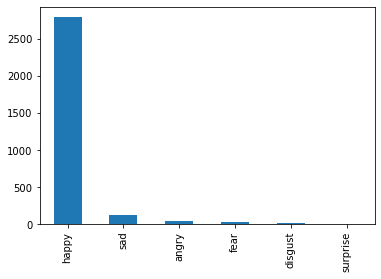

In [314]:
df['class'].value_counts().plot(kind='bar')

In [315]:
df.to_csv("newyorktimes_nuanced_sentiment_analysis_using_own_model.csv", index=False)

## Topic Modelling with Noun only

In [46]:
def get_noun(text):
    return ' '.join(word.text for word in nlp(text) if word.pos_ == 'NOUN')

In [49]:
data = df.copy()
data.head()

,category,sub_category,title,summary,article_body,complete_article
0,news,World,"Margaret C. Snyder, the U.N.’s ‘First Feminist...",Inspired by her liberal Roman Catholic upbring...,"Margaret C. Snyder, whose liberal Roman Cathol...",margaret c. snyder u.n feminist die inspire li...
1,news,World,AstraZeneca Shot Found to Be Protective Agains...,,The Covid-19 vaccine developed by AstraZeneca ...,astrazeneca shot find protective coronavirus v...
2,news,World,The Left’s Vaccine Problem,And what else you need to know today.,Want to get The Morning by email? Here’s the s...,left vaccine problem need know today want morn...
3,news,World,Wisconsin had a mask law. Then it didn’t. Then...,,The politicization of mask wearing reached fev...,wisconsin mask law stay tuned politicization m...
4,news,World,Travel and the Art of Anticipation,"For most people, going on vacation during the ...","For many of us, canceling vacations has become...",travel art anticipation people vacation pandem...


In [50]:
data.complete_article = data.complete_article.apply(get_noun)
data.head()

,category,sub_category,title,summary,article_body,complete_article
0,news,World,"Margaret C. Snyder, the U.N.’s ‘First Feminist...",Inspired by her liberal Roman Catholic upbring...,"Margaret C. Snyder, whose liberal Roman Cathol...",c. u.n roman upbringing refocus organization d...
1,news,World,AstraZeneca Shot Found to Be Protective Agains...,,The Covid-19 vaccine developed by AstraZeneca ...,shot coronavirus variant u.k covid vaccine uni...
2,news,World,The Left’s Vaccine Problem,And what else you need to know today.,Want to get The Morning by email? Here’s the s...,vaccine problem today morning email sign count...
3,news,World,Wisconsin had a mask law. Then it didn’t. Then...,,The politicization of mask wearing reached fev...,mask law politicization mask wearing fever pit...
4,news,World,Travel and the Art of Anticipation,"For most people, going on vacation during the ...","For many of us, canceling vacations has become...",travel art anticipation people vacation pandem...


## Only Nouns Frequency Graph and Word Clouds

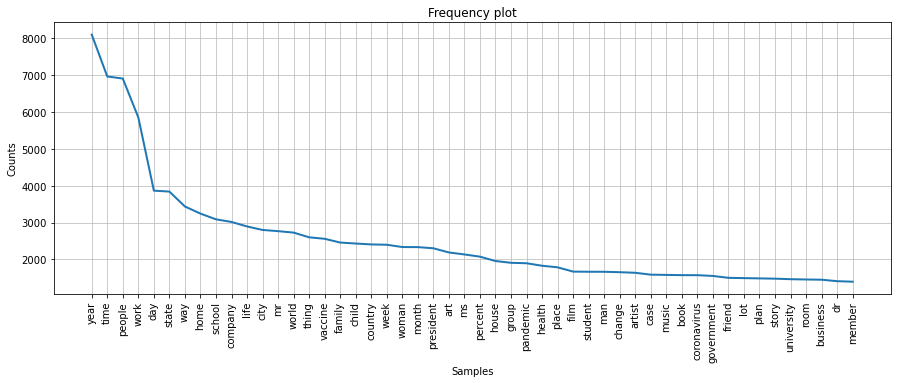

<AxesSubplot:title={'center':'Frequency plot'}, xlabel='Samples', ylabel='Counts'>

In [51]:
comment = ' '.join(data["complete_article"])
#function to split text into word
tokens = word_tokenize(comment)
vocabulary = set(tokens)
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)
plt.subplots(figsize=(15,5))
frequency_dist.plot(50,cumulative=False,title='Frequency plot')

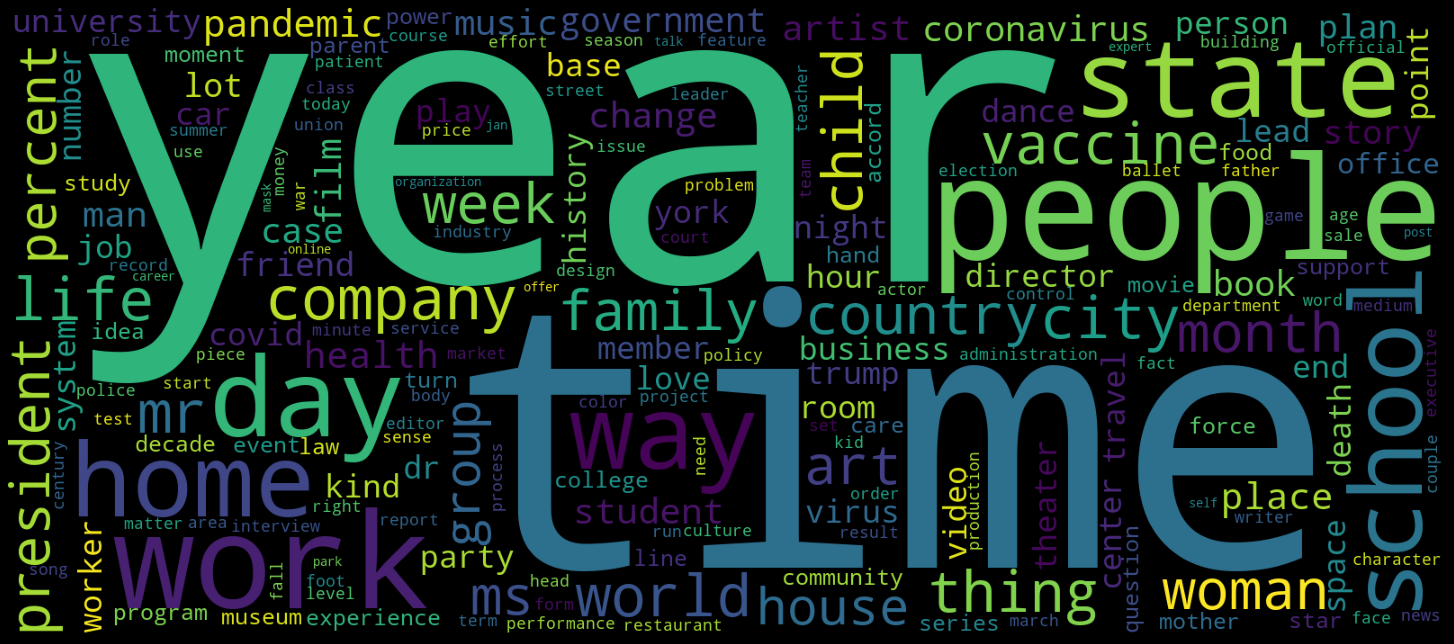

In [52]:
wordcloud = WordCloud(width=1600, height=700).generate_from_frequencies(frequency_dist)
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [155]:
data_1 = data.copy()
data_1.complete_article = data_1.complete_article.replace('', np.nan)
data_1.dropna(inplace=True)
data_1.reset_index(inplace=True, drop=True)
data_1.shape

(3001, 6)

### Find optimal number of topics

In [232]:
from gensim.models import CoherenceModel

In [233]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
documents = [doc.split() for doc in data_1.complete_article]
id2word = corpora.Dictionary(documents)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [id2word.doc2bow(doc) for doc in documents]

In [234]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [235]:
mallet_path = 'mallet-2.0.8/bin/mallet'

In [236]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=doc_term_matrix, texts=documents, start=2, limit=100, step=6)

In [237]:
import matplotlib.pyplot as plt

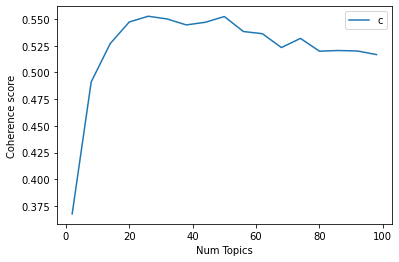

In [238]:
limit=100; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [239]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3676
Num Topics = 8  has Coherence Value of 0.4912
Num Topics = 14  has Coherence Value of 0.527
Num Topics = 20  has Coherence Value of 0.5473
Num Topics = 26  has Coherence Value of 0.5526
Num Topics = 32  has Coherence Value of 0.5501
Num Topics = 38  has Coherence Value of 0.5445
Num Topics = 44  has Coherence Value of 0.547
Num Topics = 50  has Coherence Value of 0.5524
Num Topics = 56  has Coherence Value of 0.5384
Num Topics = 62  has Coherence Value of 0.5363
Num Topics = 68  has Coherence Value of 0.5233
Num Topics = 74  has Coherence Value of 0.5319
Num Topics = 80  has Coherence Value of 0.5199
Num Topics = 86  has Coherence Value of 0.5206
Num Topics = 92  has Coherence Value of 0.5201
Num Topics = 98  has Coherence Value of 0.5168


If the coherence score seems to keep increasing, it may make better sense to pick the model that gave the highest CV before flattening out. This is exactly the case here.

So for further steps I will choose the model with 50 topics itself.

In [240]:
from pprint import pprint

In [241]:
# Select the model and print the topics
optimal_model = model_list[8]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(4,
  '0.022*"winter" + 0.020*"area" + 0.019*"park" + 0.018*"mountain" + '
  '0.017*"snow" + 0.017*"town" + 0.013*"place" + 0.013*"road" + 0.013*"ski" + '
  '0.012*"hour"'),
 (30,
  '0.138*"woman" + 0.028*"girl" + 0.028*"man" + 0.023*"child" + 0.017*"year" + '
  '0.015*"life" + 0.014*"baby" + 0.014*"mother" + 0.013*"pregnancy" + '
  '0.011*"work"'),
 (23,
  '0.035*"year" + 0.025*"game" + 0.020*"bowl" + 0.019*"host" + 0.019*"party" + '
  '0.018*"time" + 0.016*"night" + 0.015*"fan" + 0.014*"sunday" + 0.011*"day"'),
 (12,
  '0.025*"climate" + 0.023*"oil" + 0.020*"year" + 0.020*"plant" + 0.017*"fire" '
  '+ 0.017*"change" + 0.016*"cover" + 0.014*"gas" + 0.013*"life" + '
  '0.010*"plastic"'),
 (44,
  '0.048*"police" + 0.032*"capitol" + 0.026*"officer" + 0.025*"group" + '
  '0.018*"violence" + 0.018*"member" + 0.017*"jan" + 0.016*"attack" + '
  '0.014*"law" + 0.012*"threat"'),
 (32,
  '0.159*"city" + 0.029*"street" + 0.026*"york" + 0.020*"neighborhood" + '
  '0.017*"people" + 0.017*"communi

In [242]:
countVectorizer = CountVectorizer()
termFrequency = countVectorizer.fit_transform(data_1.complete_article)
featureNames = countVectorizer.get_feature_names()

In [257]:
lda = LatentDirichletAllocation(n_components=50, max_iter=10)
lda.fit(termFrequency)

LatentDirichletAllocation(n_components=50)

In [244]:
nmf = NMF(n_components=50, max_iter=5000)
data_nmf = nmf.fit_transform(termFrequency) 

In [245]:
lsi = TruncatedSVD(n_components=50)
data_lsi = lsi.fit_transform(termFrequency)

In [246]:
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [258]:
print("LDA Model:")
selected_topics(lda, countVectorizer)

LDA Model:
Topic 0:
[('time', 93.93575263868851), ('pregnancy', 89.99032627251606), ('owl', 71.96368758217483), ('year', 59.524484586449454), ('attention', 54.191195174776176), ('leopard', 54.01914676872872), ('celebrity', 46.88862121444301), ('bird', 41.90977391499466), ('park', 38.488718743170864), ('recombination', 38.019999999996465)]
Topic 1:
[('company', 228.4244950294586), ('amazon', 170.52742587425436), ('obituary', 142.19097799163404), ('mr', 104.1172862247151), ('time', 84.58342333527908), ('term', 83.52747382965237), ('year', 78.56779572309165), ('service', 75.65141427218657), ('google', 60.7968013539557), ('tech', 59.83310560857282)]
Topic 2:
[('restaurant', 377.7333247192889), ('chef', 199.33556556654548), ('food', 153.00910115370584), ('street', 93.09736426865267), ('brexit', 64.99156608712606), ('market', 62.970227500205496), ('menu', 61.86302893107155), ('cook', 57.380802890793724), ('kitchen', 51.38806145918537), ('art', 50.14191995909868)]
Topic 3:
[('vaccine', 690.58

[('art', 791.8348799430336), ('museum', 597.1849531947985), ('artist', 314.3458106206043), ('work', 303.6207133035422), ('image', 160.93278190345802), ('gallery', 137.8911576750671), ('painting', 122.35540389749897), ('exhibition', 115.24324918351225), ('time', 107.56440328251965), ('director', 97.01009933139966)]
Topic 28:
[('game', 233.72392522753012), ('player', 198.45417505267613), ('team', 178.34170909146147), ('plan', 138.2952422028731), ('league', 133.54264206210348), ('sport', 130.9530892238955), ('season', 129.7081314744224), ('football', 127.64351996338007), ('coach', 115.6058769109831), ('athlete', 97.14546663894752)]
Topic 29:
[('woman', 703.3654332625687), ('book', 375.9526810369141), ('man', 366.69141436040275), ('year', 365.86828649693393), ('life', 360.29122716027666), ('work', 355.247315373632), ('play', 347.5505364958022), ('theater', 337.5391397697764), ('time', 324.6146009882514), ('film', 207.6131446740444)]
Topic 30:
[('design', 179.69350977426538), ('work', 119.3

In [248]:
print("NMF Model:")
selected_topics(nmf, countVectorizer)

NMF Model:
Topic 0:
[('people', 45.68182291500446), ('community', 6.463521953089485), ('life', 4.541299326000862), ('mask', 4.352554633547133), ('time', 4.1403327586601755), ('number', 3.390434268895773), ('family', 3.3154491939662423), ('need', 2.9051914933634015), ('risk', 2.760460931508068), ('supply', 2.667861992795942)]
Topic 1:
[('vaccine', 16.92235839777188), ('dose', 3.190059051748469), ('health', 3.028896185393277), ('vaccination', 2.431378948749815), ('country', 2.2333750087141455), ('trial', 2.1242657234431785), ('pfizer', 1.9238612866035754), ('shot', 1.7612622769519792), ('covid', 1.439075219360554), ('supply', 1.398484731136755)]
Topic 2:
[('smell', 13.782940052675174), ('people', 5.277753225629273), ('sense', 3.4682805329175146), ('loss', 2.66081909086223), ('patient', 2.1330524523294416), ('virus', 2.016241579671475), ('olfaction', 1.9001938203475806), ('scientist', 1.8930382782542308), ('taste', 1.7240320559058522), ('way', 1.610558785136906)]
Topic 3:
[('party', 8.611

[('capitol', 6.805725793928688), ('police', 6.030771404135781), ('datum', 4.889805339637721), ('law', 4.4903285404259785), ('jan', 3.3827571423281575), ('officer', 3.328055657830194), ('information', 2.9799440410120197), ('threat', 2.7037712598790793), ('government', 2.686052606570613), ('security', 2.600796258926447)]
Topic 27:
[('hotel', 14.429749022347664), ('room', 8.575197486127067), ('restaurant', 5.659127707427601), ('kitchen', 5.182754687334188), ('space', 4.55412649550628), ('guest', 3.3989327721106477), ('business', 3.0073710552329174), ('dining', 2.4444042186939554), ('air', 2.0677490820726434), ('pandemic', 1.7524044183939609)]
Topic 28:
[('year', 20.138284304680962), ('time', 3.4410075853086144), ('month', 1.1005832797345652), ('world', 0.9076275126103305), ('end', 0.8063009839526434), ('country', 0.801331386470786), ('decade', 0.715230787287586), ('summer', 0.6086181368485555), ('kid', 0.5853041605408329), ('friend', 0.5841943171787382)]
Topic 29:
[('people', 8.0633506484

In [249]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    sent_topics_df = pd.concat([sent_topics_df, texts], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=doc_term_matrix, texts=data_1)

In [250]:
df_topic_sents_keywords.head()

,Dominant_Topic,Perc_Contribution,Topic_Keywords,category,sub_category,title,summary,article_body,complete_article
0,30.0,0.4174,"woman, girl, man, child, year, life, baby, mot...",news,World,"Margaret C. Snyder, the U.N.’s ‘First Feminist...",Inspired by her liberal Roman Catholic upbring...,"Margaret C. Snyder, whose liberal Roman Cathol...",c. u.n roman upbringing refocus organization d...
1,48.0,0.4450,"dr, virus, coronavirus, test, health, mask, va...",news,World,AstraZeneca Shot Found to Be Protective Agains...,,The Covid-19 vaccine developed by AstraZeneca ...,shot coronavirus variant u.k covid vaccine uni...
2,21.0,0.1903,"vaccine, health, state, people, vaccination, d...",news,World,The Left’s Vaccine Problem,And what else you need to know today.,Want to get The Morning by email? Here’s the s...,vaccine problem today morning email sign count...
3,48.0,0.2141,"dr, virus, coronavirus, test, health, mask, va...",news,World,Wisconsin had a mask law. Then it didn’t. Then...,,The politicization of mask wearing reached fev...,mask law politicization mask wearing fever pit...
4,27.0,0.5607,"pandemic, travel, time, year, march, month, co...",news,World,Travel and the Art of Anticipation,"For most people, going on vacation during the ...","For many of us, canceling vacations has become...",travel art anticipation people vacation pandem...


<AxesSubplot:>

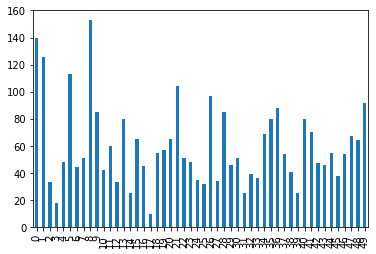

In [251]:
df_topic_sents_keywords.Dominant_Topic.astype('int').value_counts().plot(kind='bar')

## Topic count by sub_category

In [252]:
plots_data = df_topic_sents_keywords.groupby(['sub_category', 'Dominant_Topic'])['Dominant_Topic'].count()

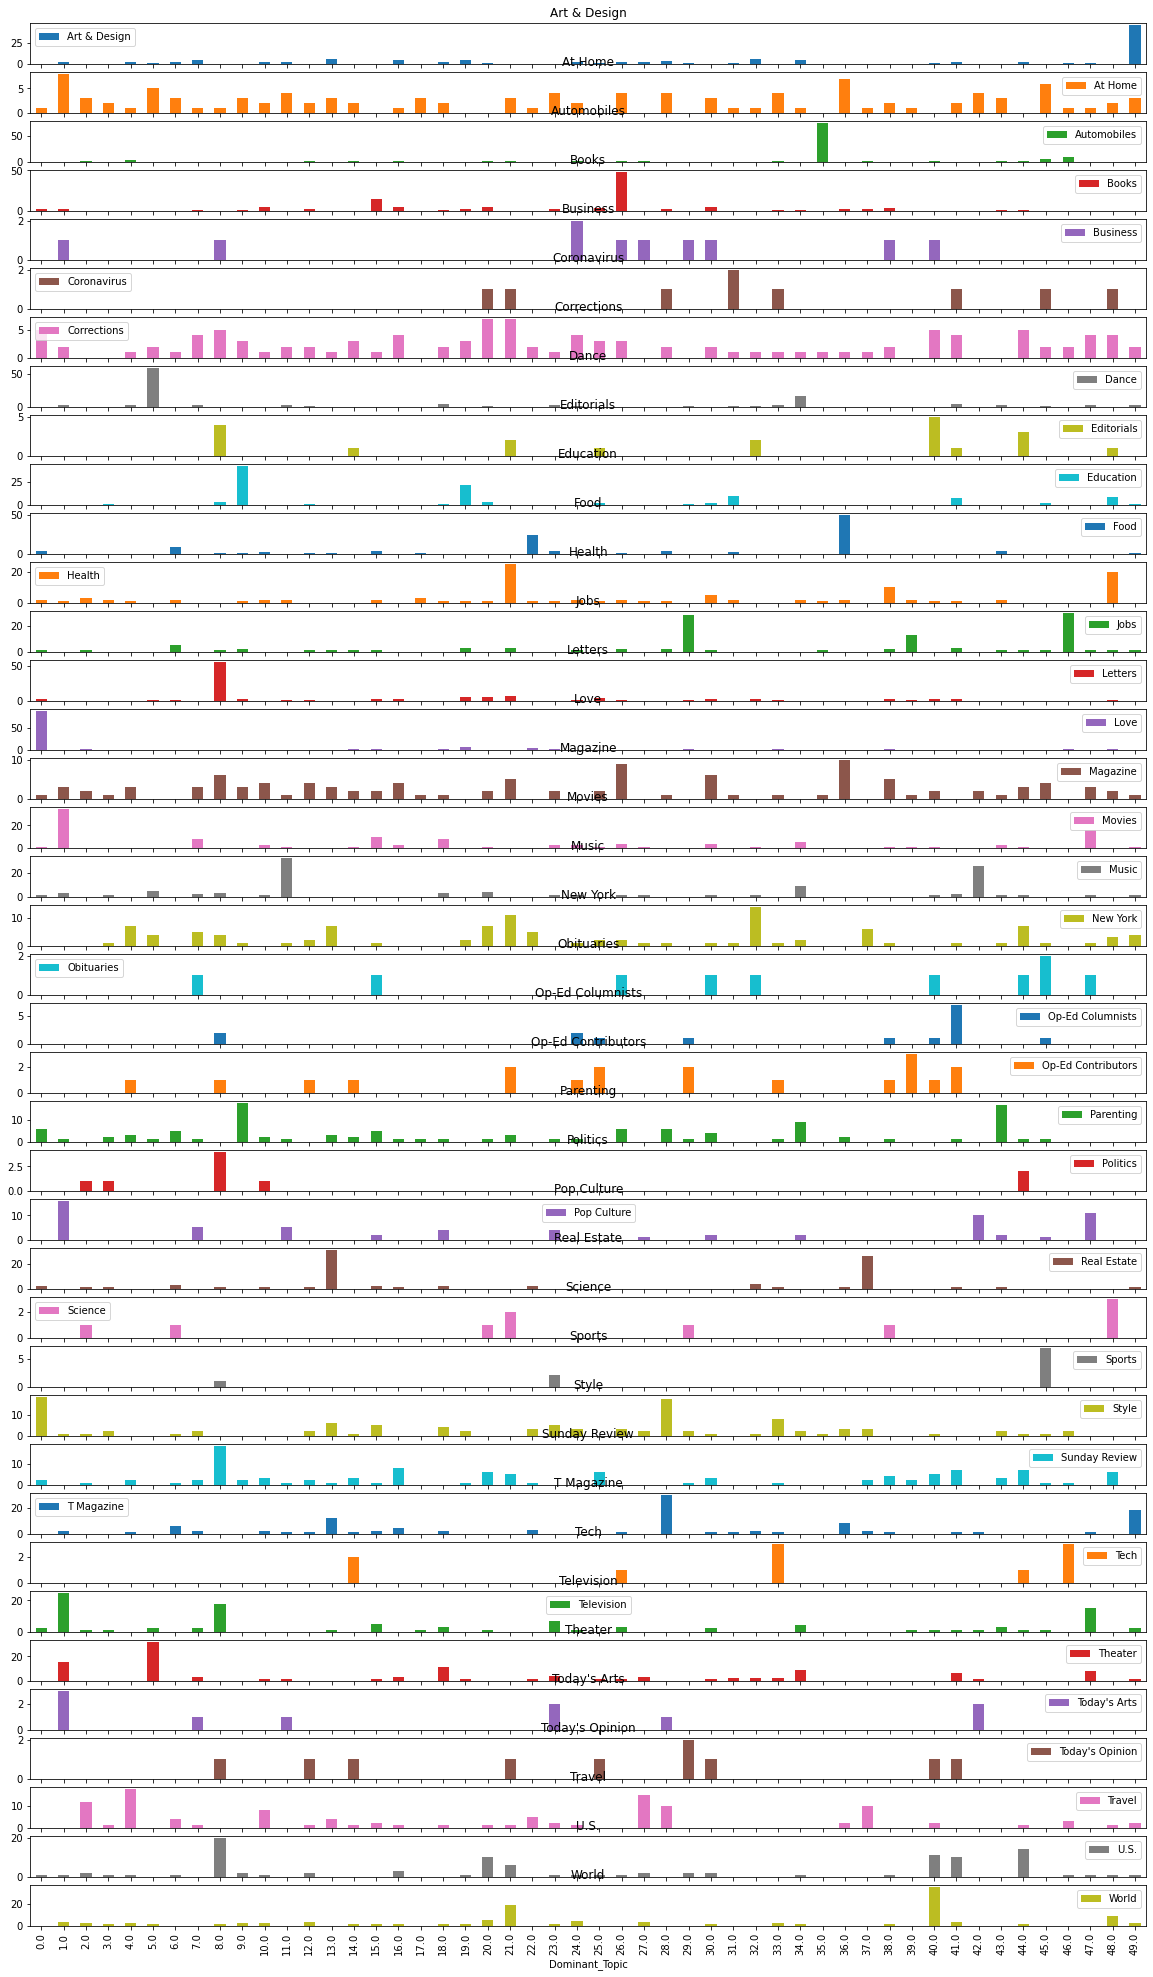

In [253]:
plots_data.unstack(level=0).plot(kind='bar', subplots=True, figsize=(20,35))
plt.show()

## Topic count by category

In [254]:
plots_data = df_topic_sents_keywords.groupby(['category', 'Dominant_Topic'])['Dominant_Topic'].count()

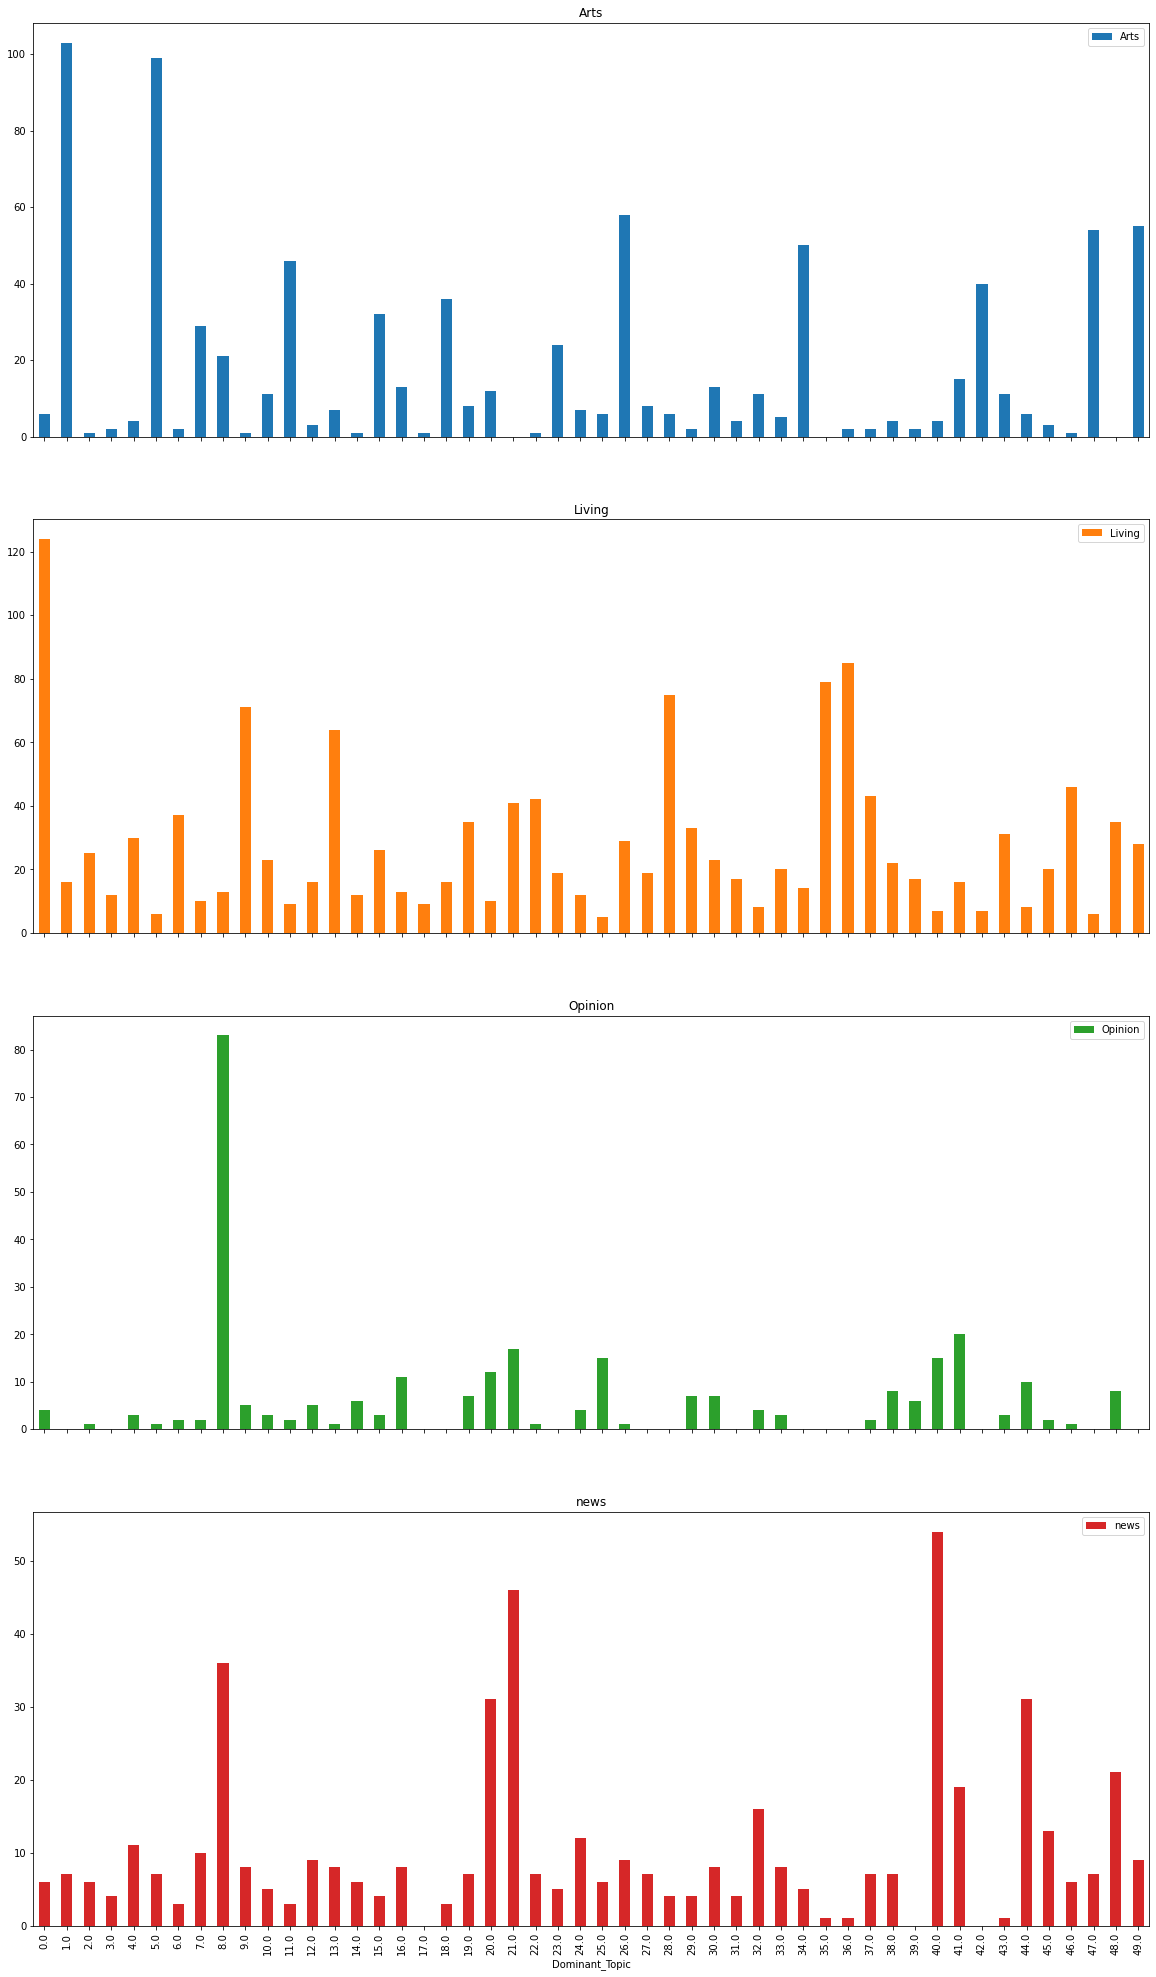

In [255]:
plots_data.unstack(level=0).plot(kind='bar', subplots=True, figsize=(20,35))
plt.show()

In [262]:
df_topic_sents_keywords.to_csv('newyorktimes_topic_modelling.csv', index=False)